In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from kneed import KneeLocator
import warnings
warnings.filterwarnings('ignore')

In [226]:
data = pd.read_csv('Country-data.csv')
df=data.copy()
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [228]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [229]:
from summarytools import dfSummary
dfSummary(df)

In [230]:
print('Number of duplicated rows: ' , len(df[df.duplicated()]))

Number of duplicated rows:  0


In [231]:
df.apply(lambda x: len(x.unique()))

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

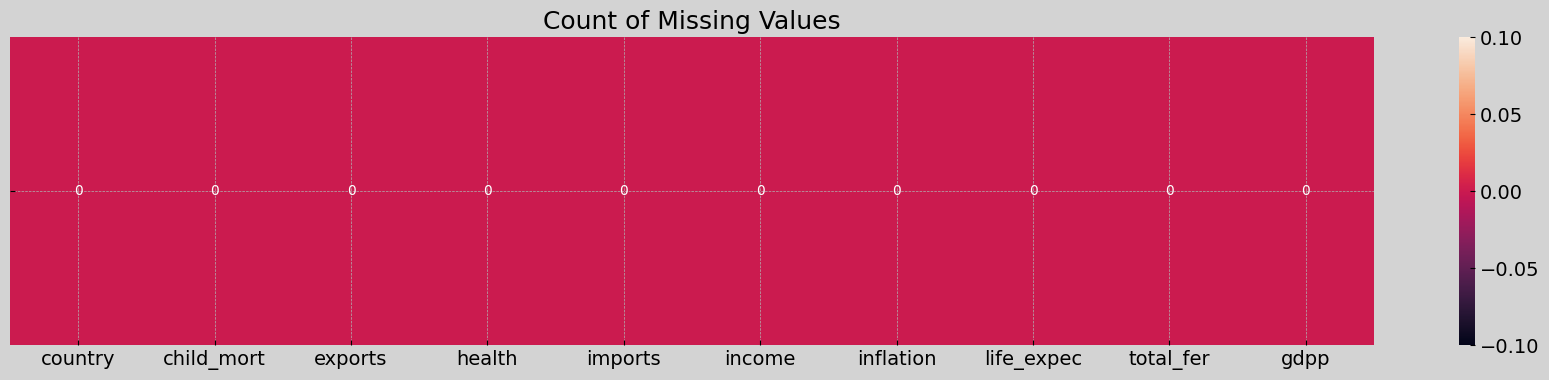

In [232]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']) 
plt.figure(figsize=(22,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T, annot=True,
            ).set_title('Count of Missing Values', fontsize=18)
plt.show()

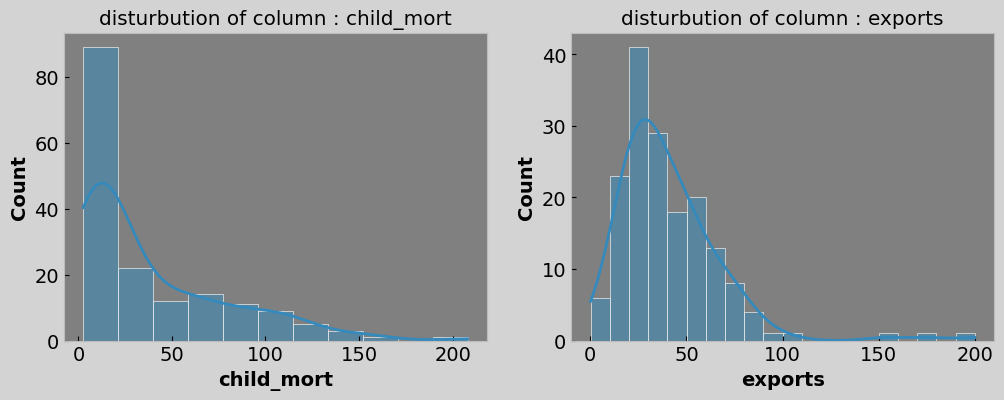

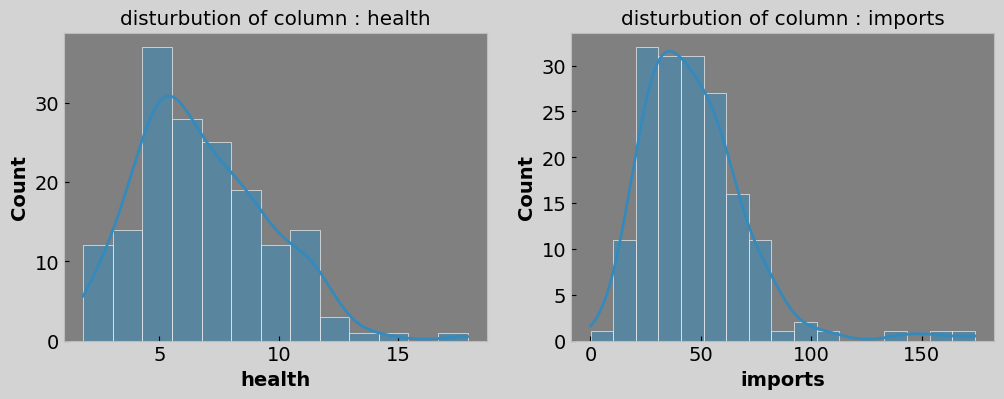

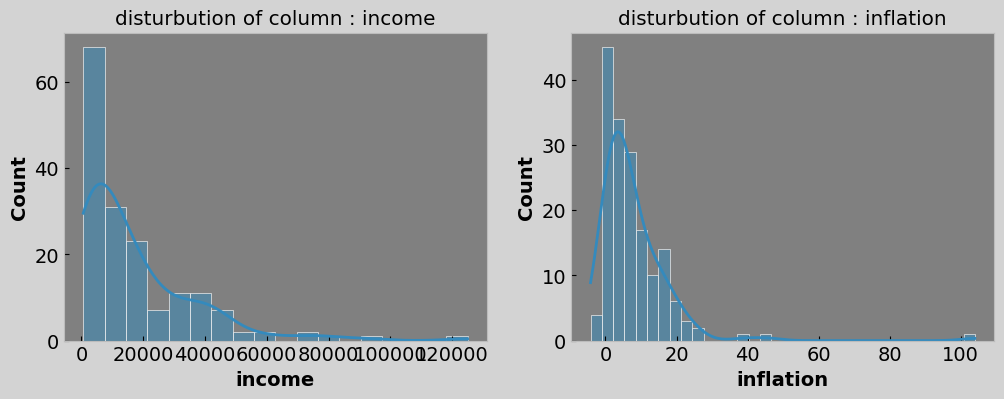

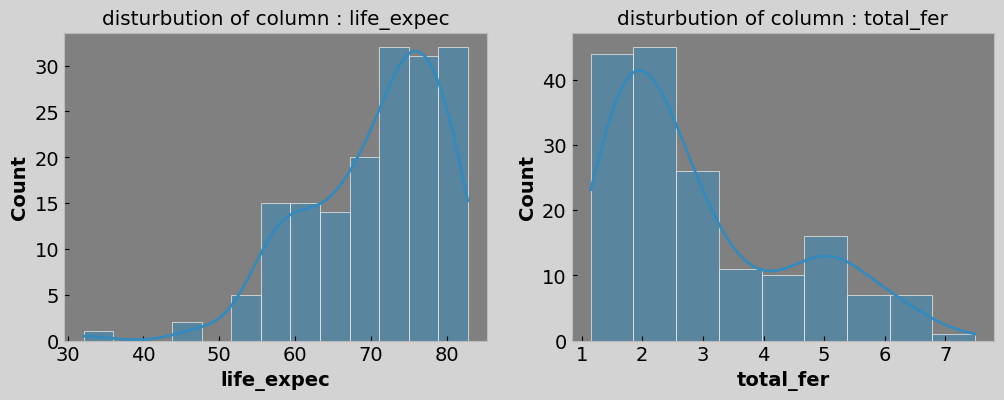

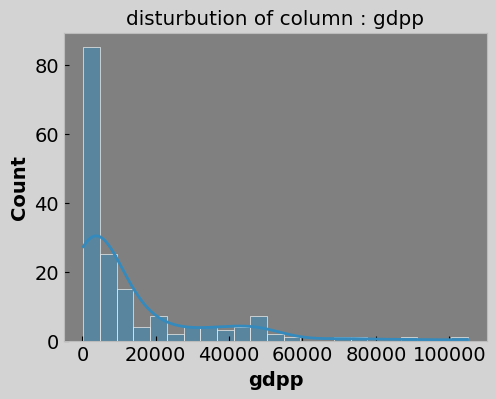

In [233]:
hist_plot = list (df.drop ("country" , axis = 1))               
i =  0
while i < 9:
    plt.figure (figsize = [12 , 4])
    plt.subplot (1 , 2 , 1)   
    sns.histplot(df [hist_plot [i]] , kde=True)
    plt.title ('disturbution of column : ' + hist_plot [i])
    plt.grid ()
    i += 1
    
    if i < 9 :
        plt.subplot (1 , 2 , 2)
        sns.histplot(df [hist_plot [i]] , kde=True)
        plt.title ('disturbution of column : ' + hist_plot [i])
        plt.grid ()
        i += 1
        plt.show ()

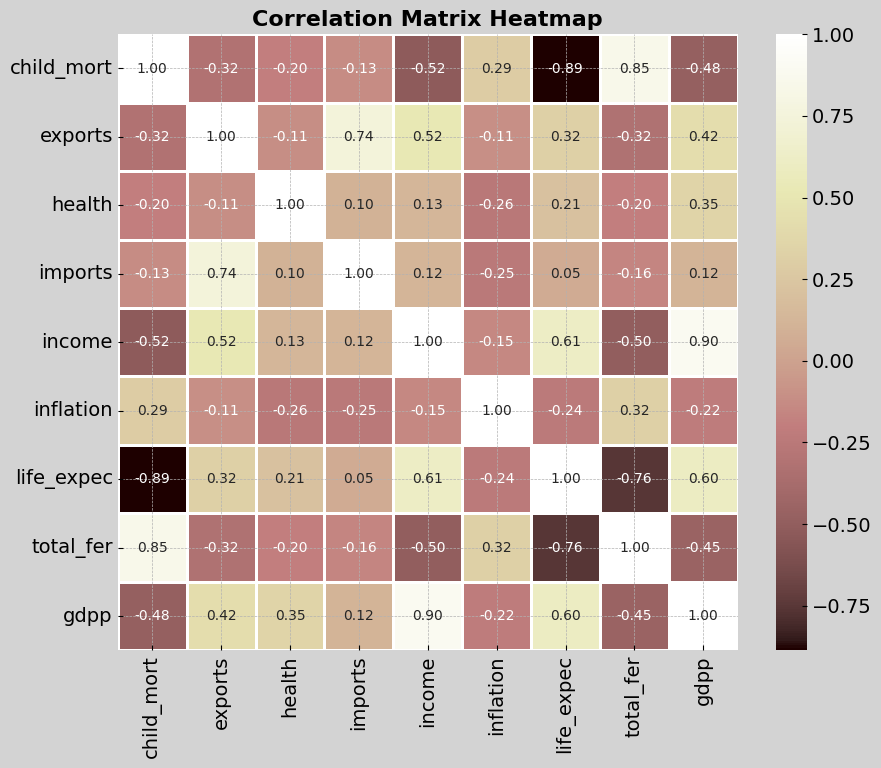

Top 4 pairs of features with the highest correlations:
'gdpp' and 'income' with a correlation of 0.90
'income' and 'gdpp' with a correlation of 0.90
'total_fer' and 'child_mort' with a correlation of 0.85
'child_mort' and 'total_fer' with a correlation of 0.85
'imports' and 'exports' with a correlation of 0.74
'exports' and 'imports' with a correlation of 0.74
'income' and 'life_expec' with a correlation of 0.61
'life_expec' and 'income' with a correlation of 0.61


In [234]:
corr_matrix = df.iloc[:, 1:].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_matrix, annot=True, fmt=".2f", linewidth=0.75, cmap="pink")
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.show()

# Find the top 4 pairs of features with the highest correlations
corr_matrix_np = corr_matrix.to_numpy()
np.fill_diagonal(corr_matrix_np, 0)  # Replace diagonal elements with 0 for max finding

# Flatten the matrix and get the indices of the top 4 values
flat_corr = corr_matrix_np.flatten()
top_8_indices = flat_corr.argsort()[-8:][::-1]  # Indices of top 4 highest correlations

# Convert flat indices back to 2D indices
row_indices, col_indices = np.unravel_index(top_8_indices, corr_matrix_np.shape)

# Get the corresponding feature names and correlation values
top_8_pairs = [(corr_matrix.index[row], corr_matrix.columns[col], flat_corr[top_8_indices[i]]) 
               for i, (row, col) in enumerate(zip(row_indices, col_indices))]

print("Top 4 pairs of features with the highest correlations:")
for feature_1, feature_2, corr_value in top_8_pairs:
    print(f"'{feature_1}' and '{feature_2}' with a correlation of {corr_value:.2f}")

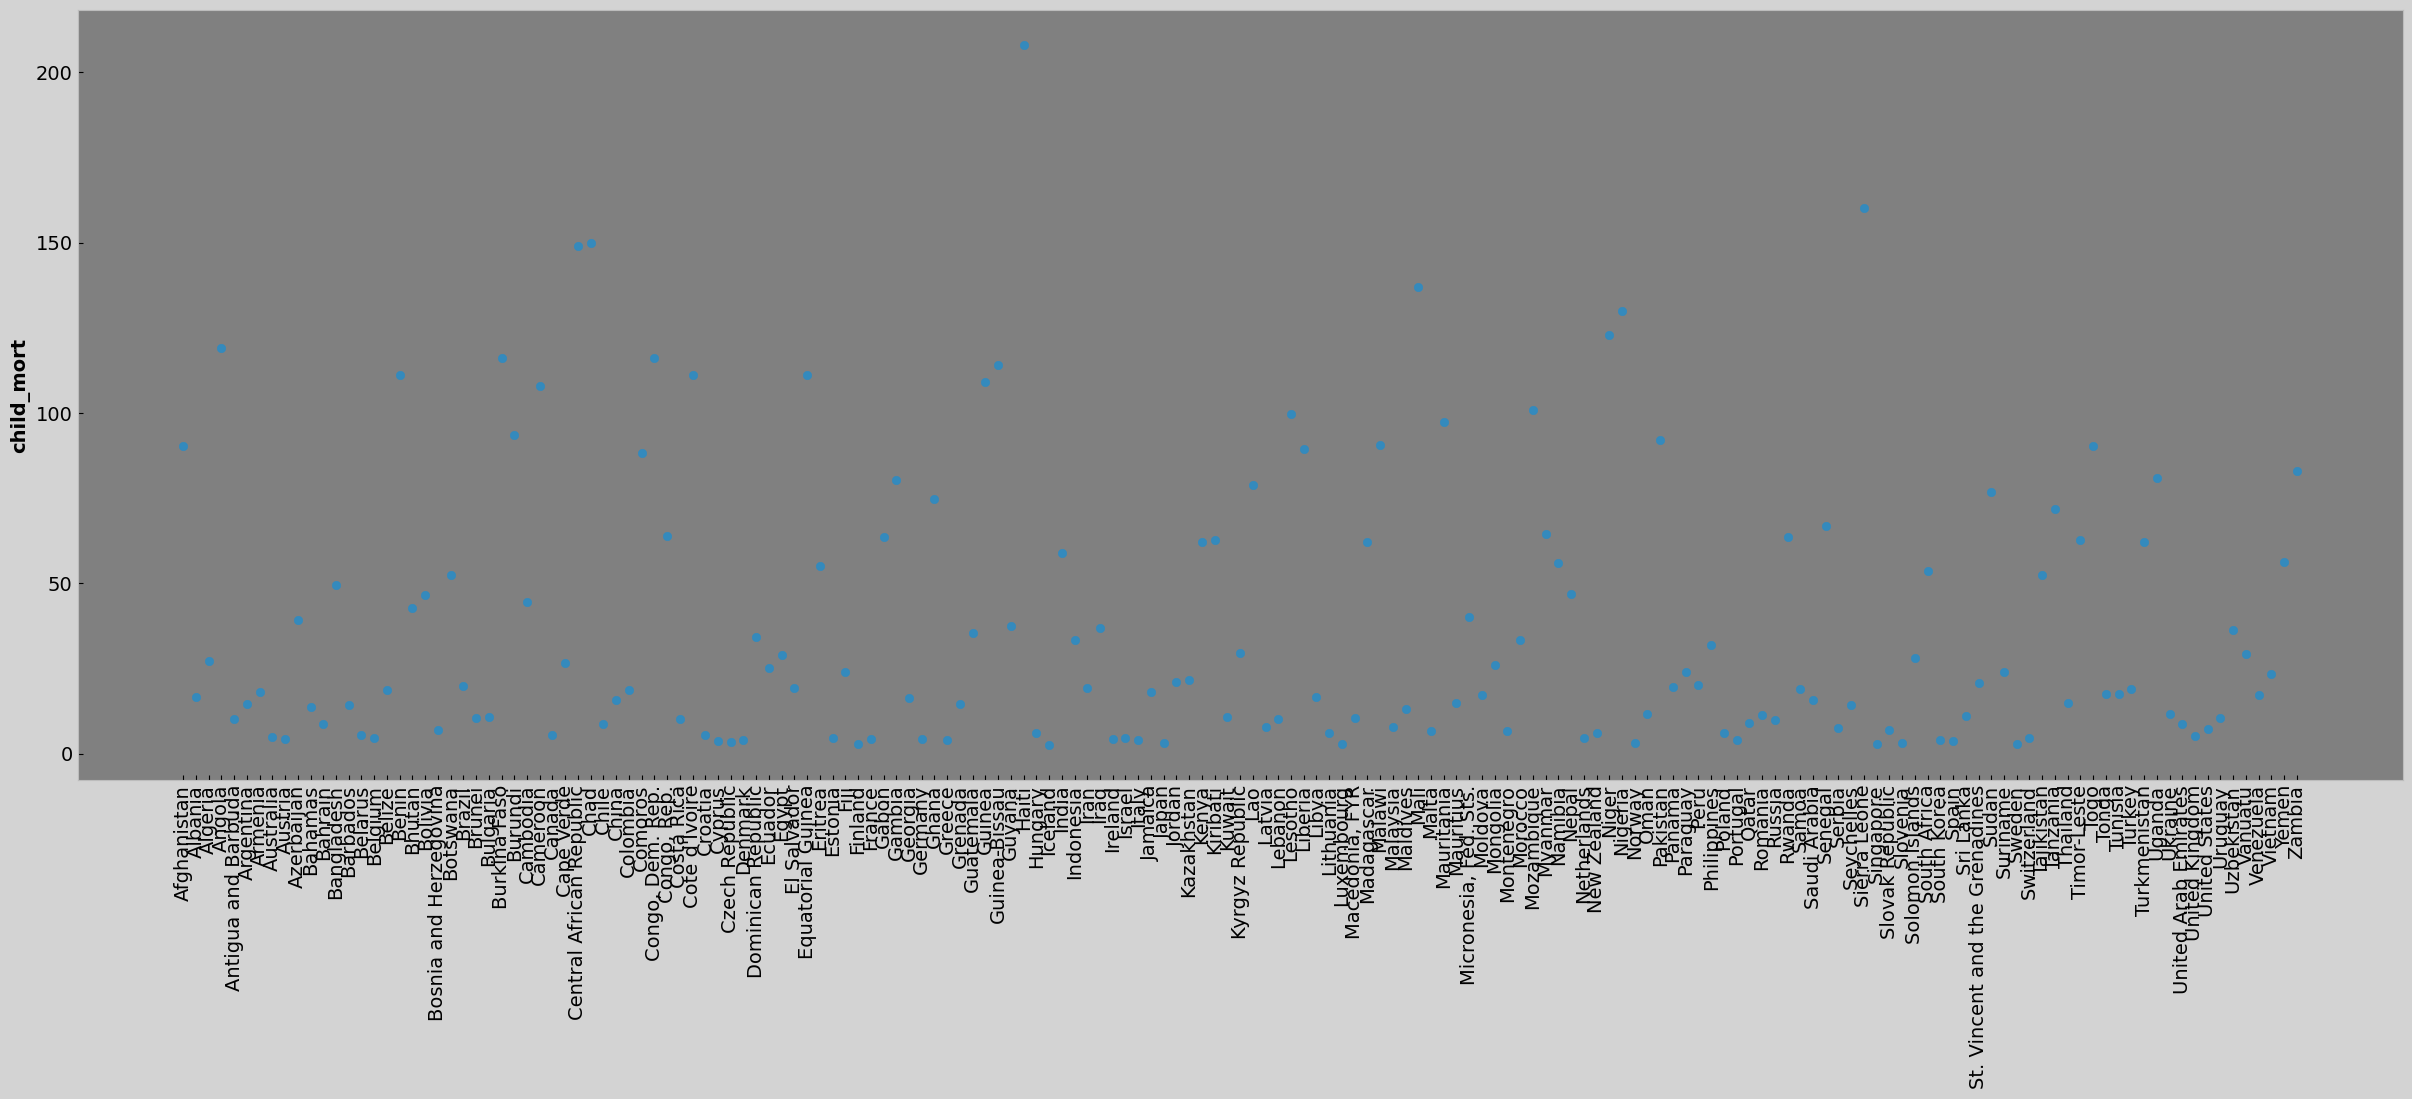

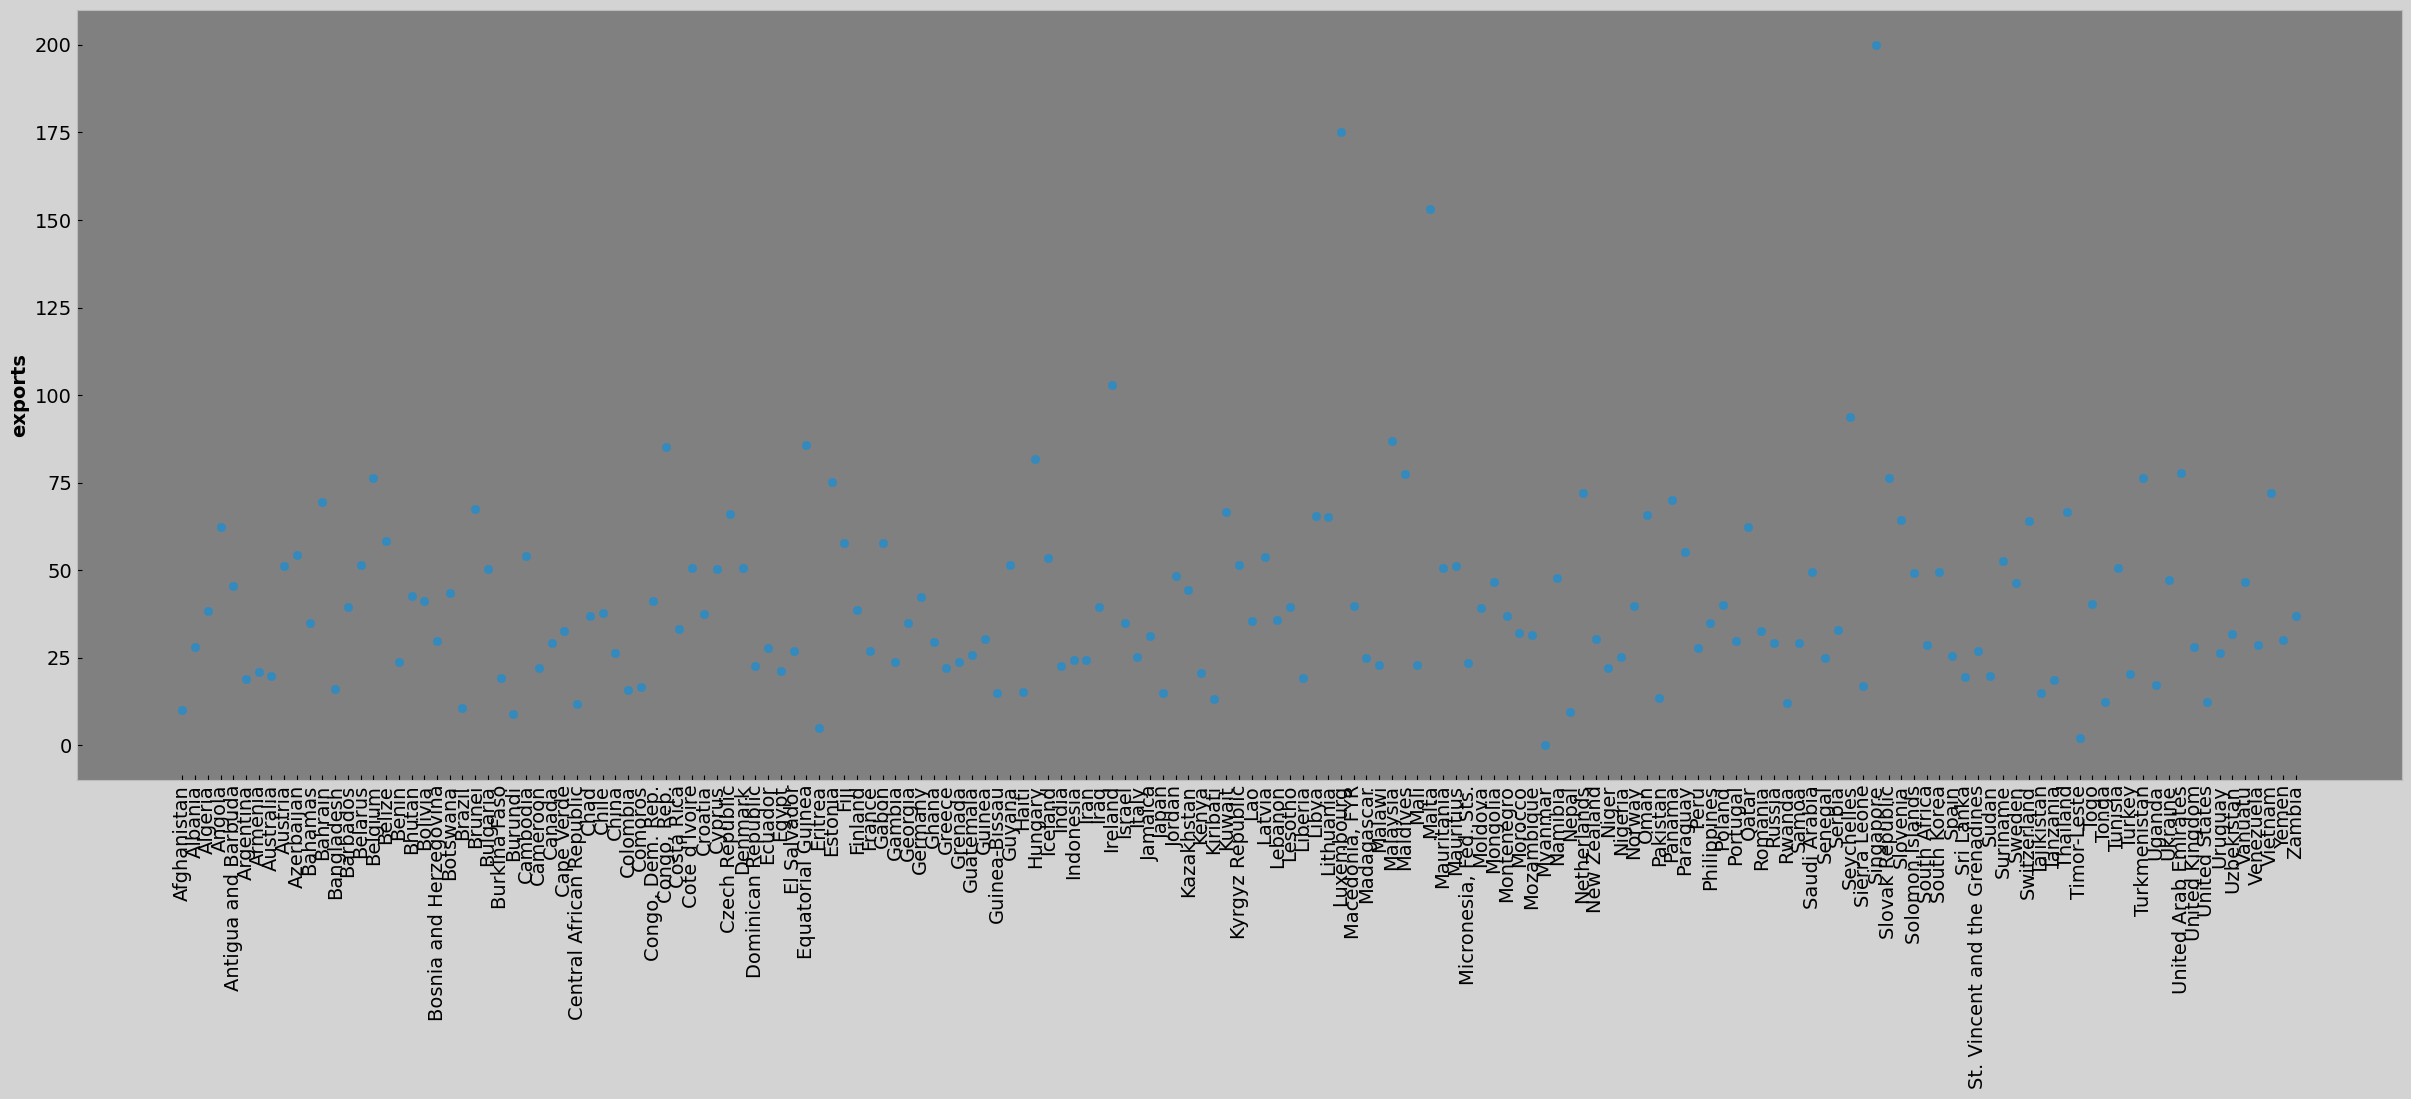

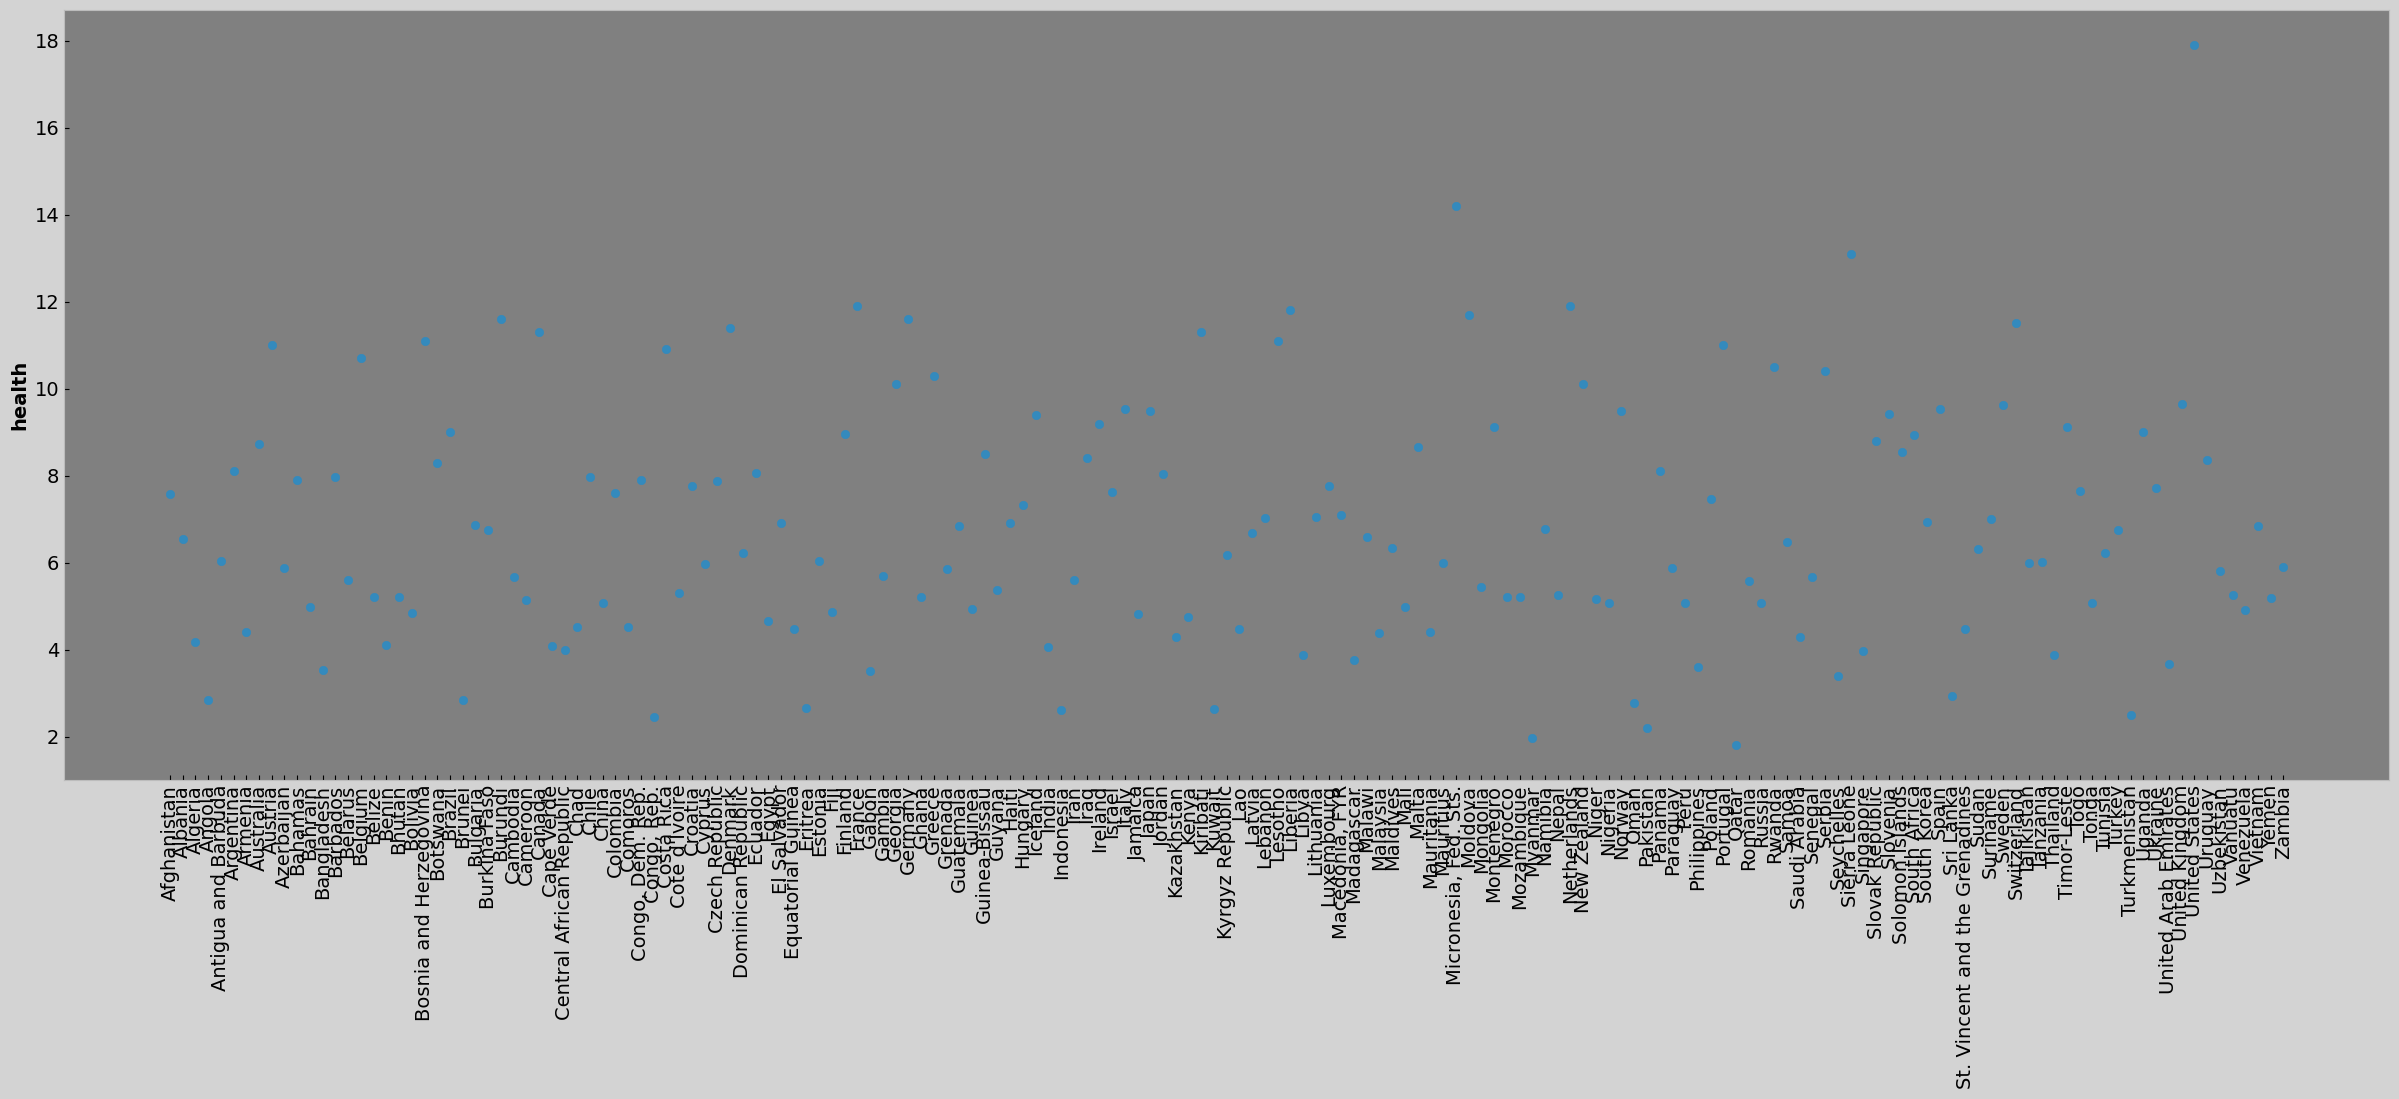

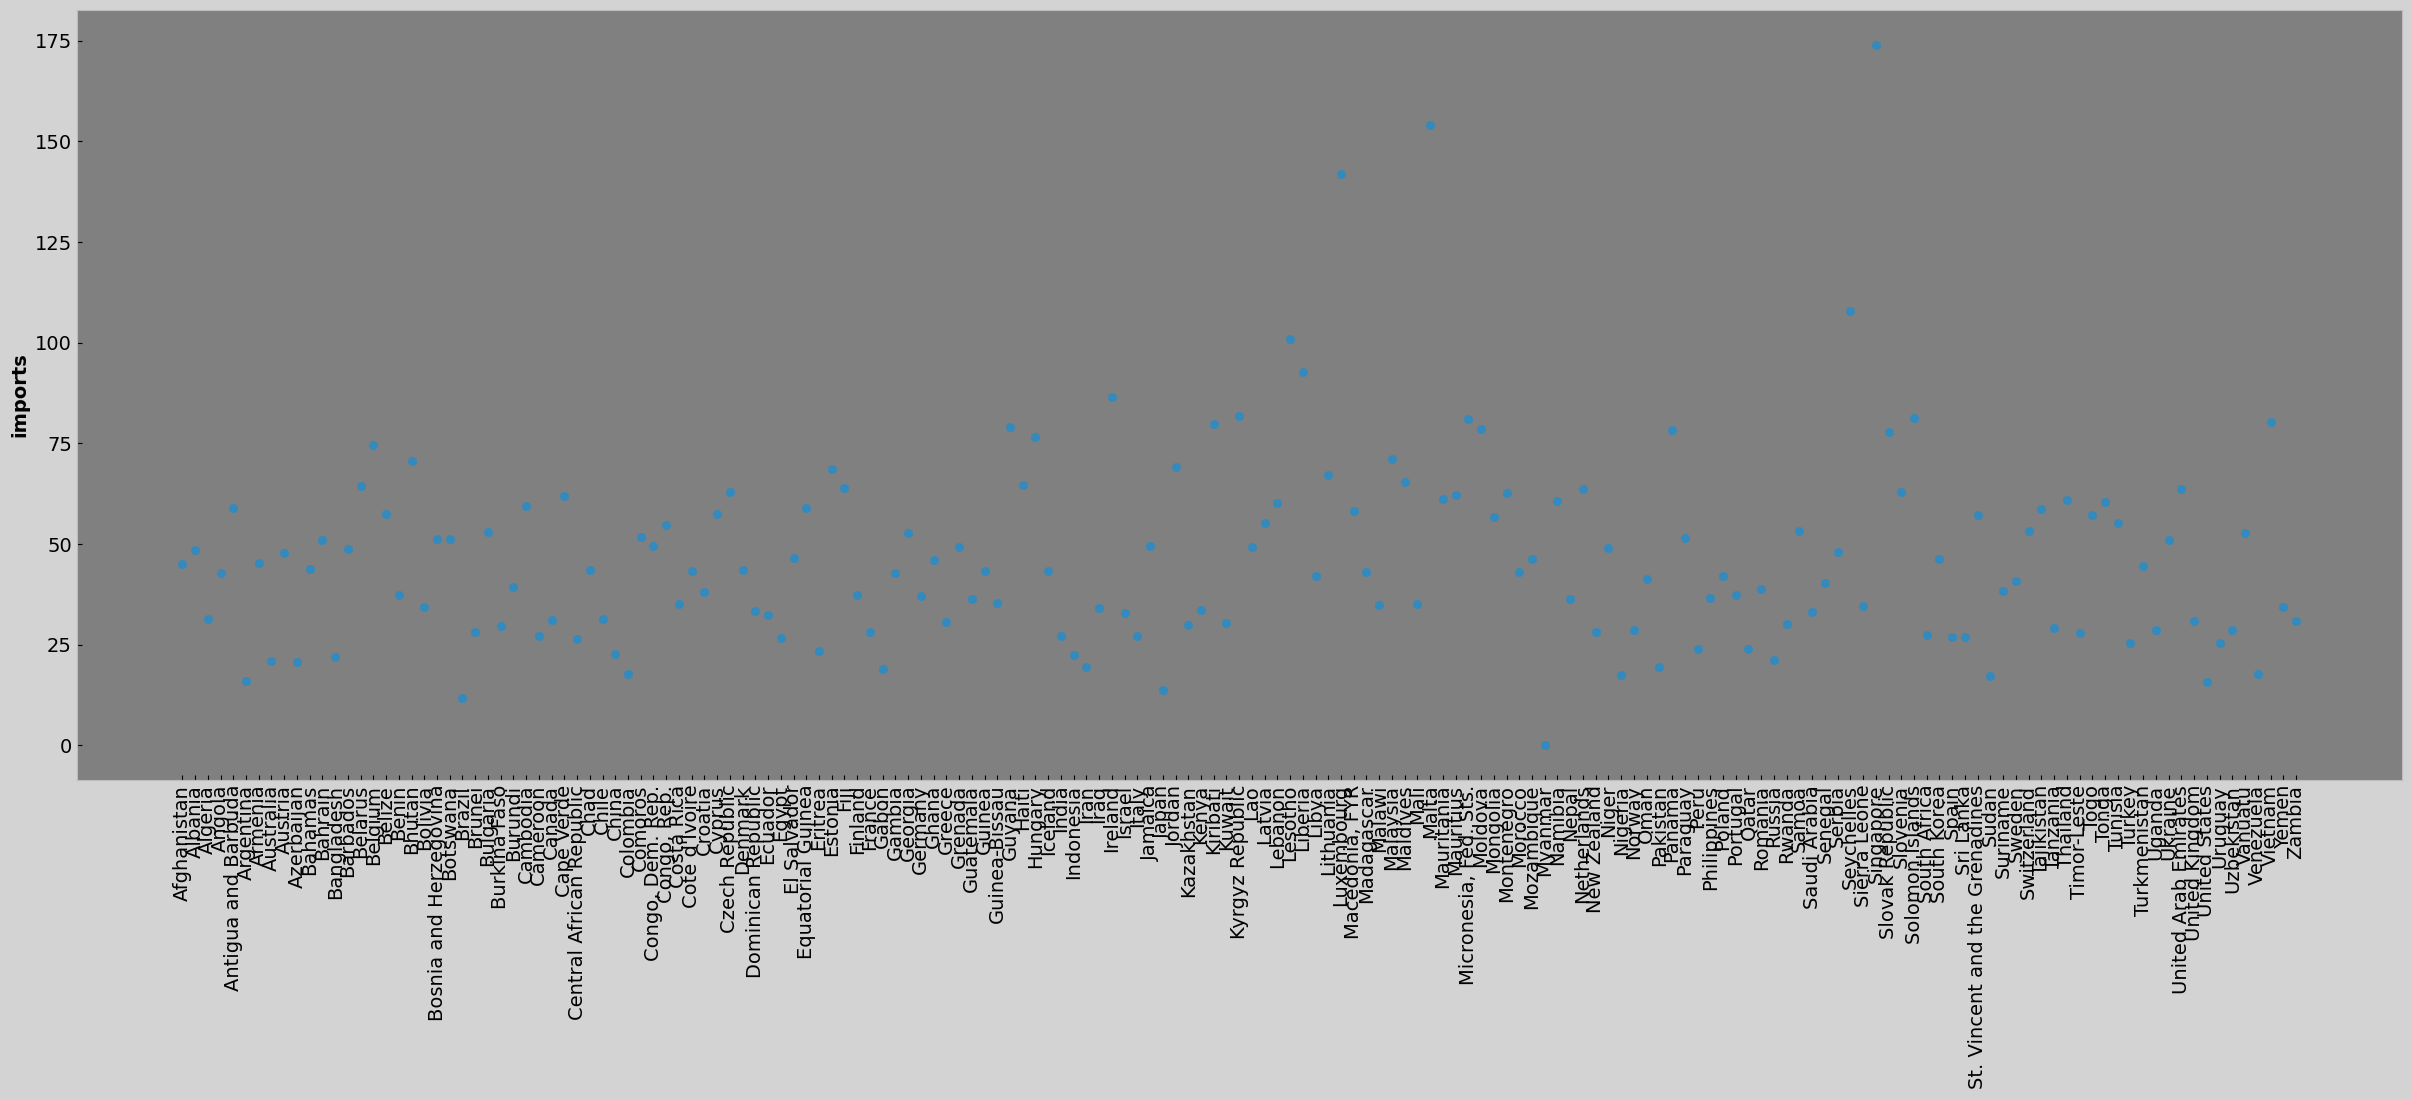

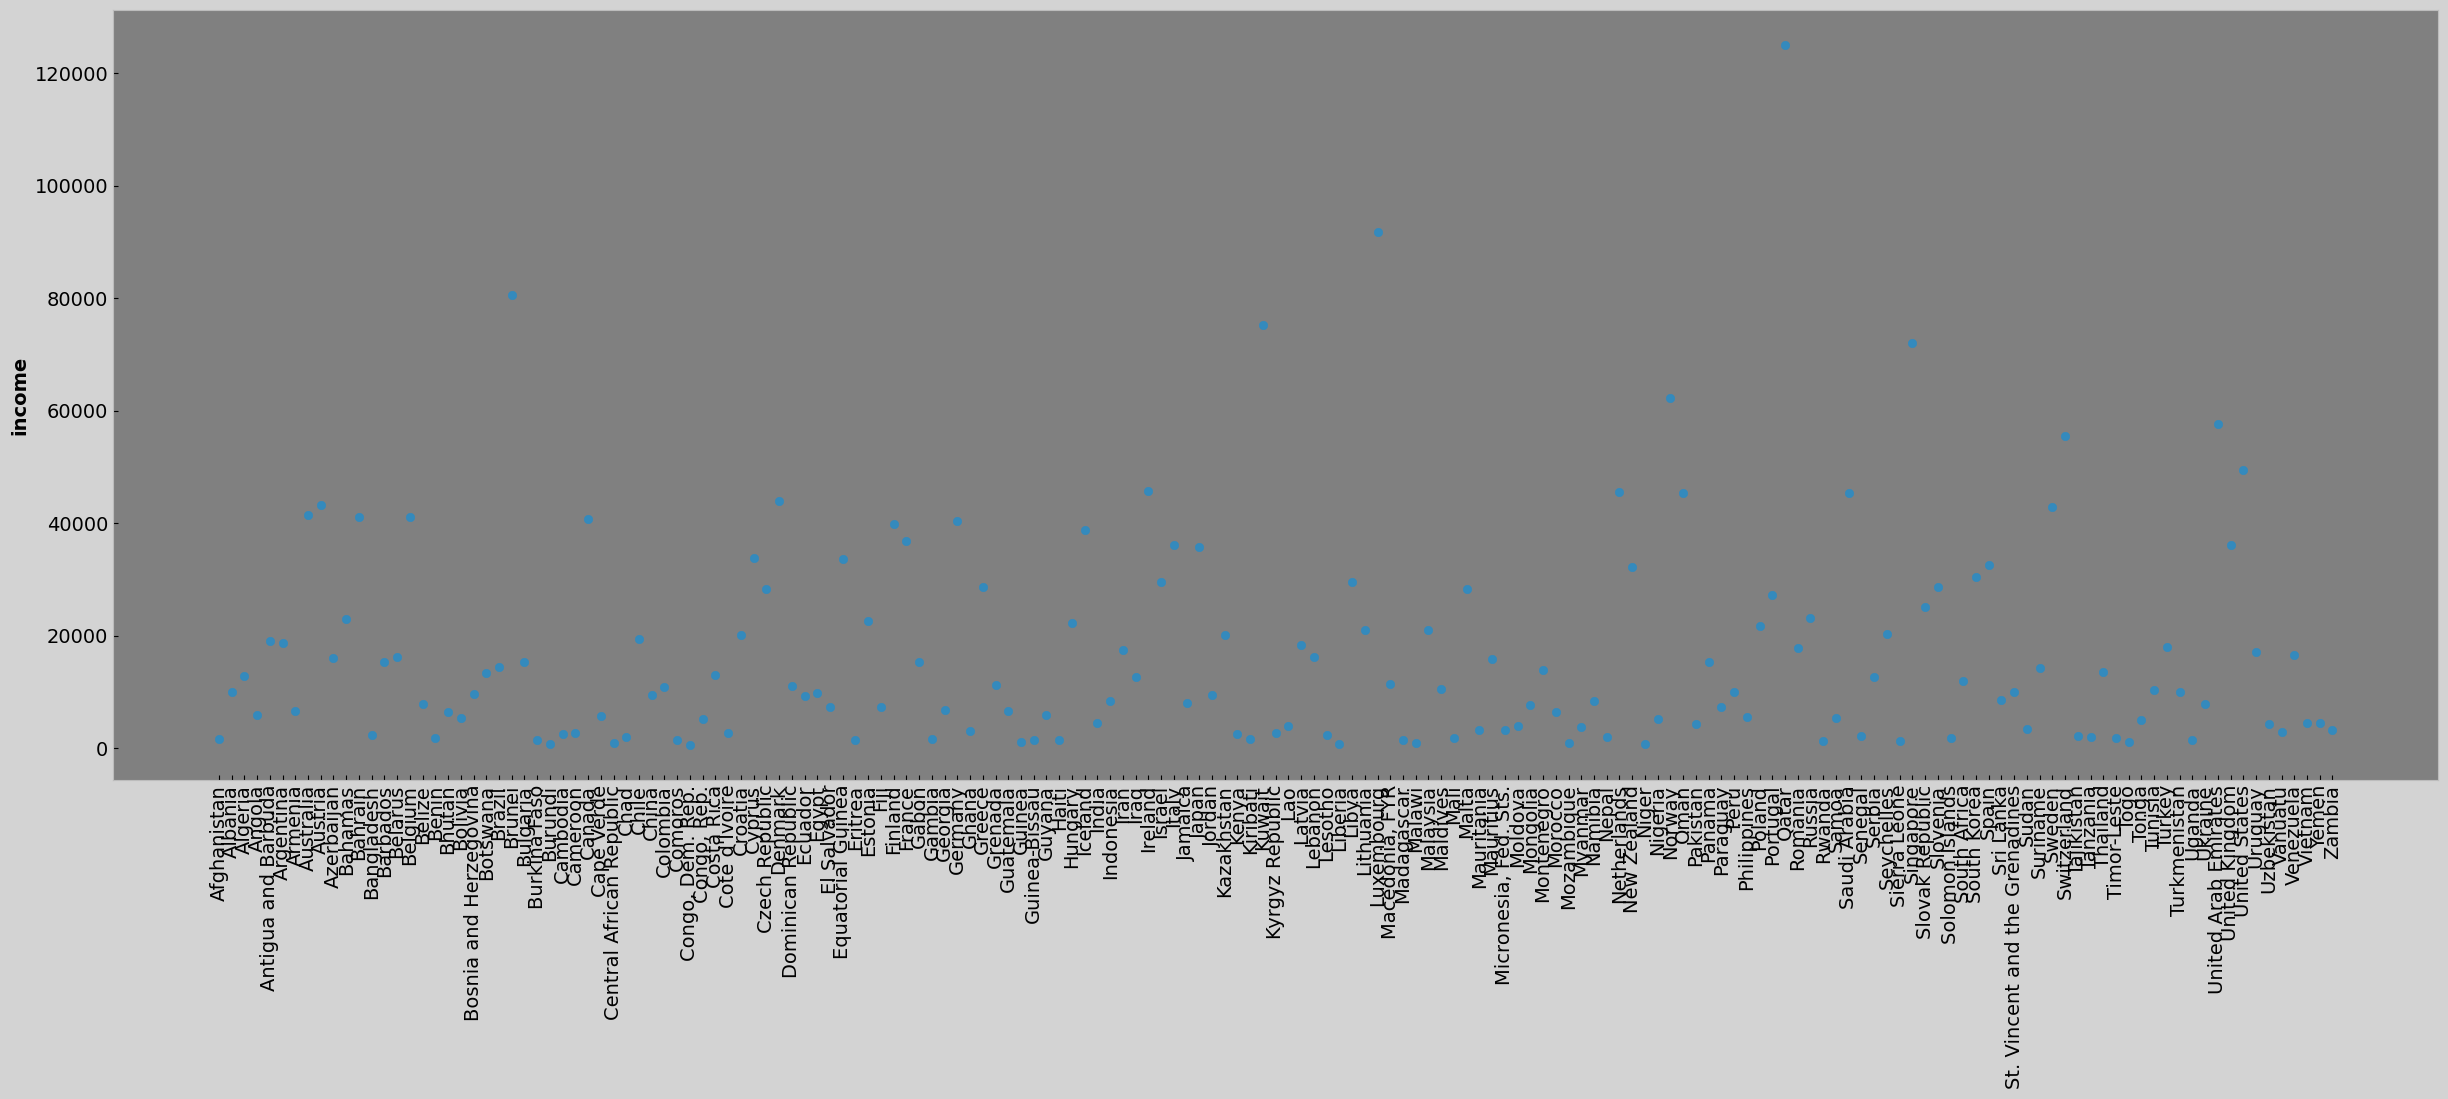

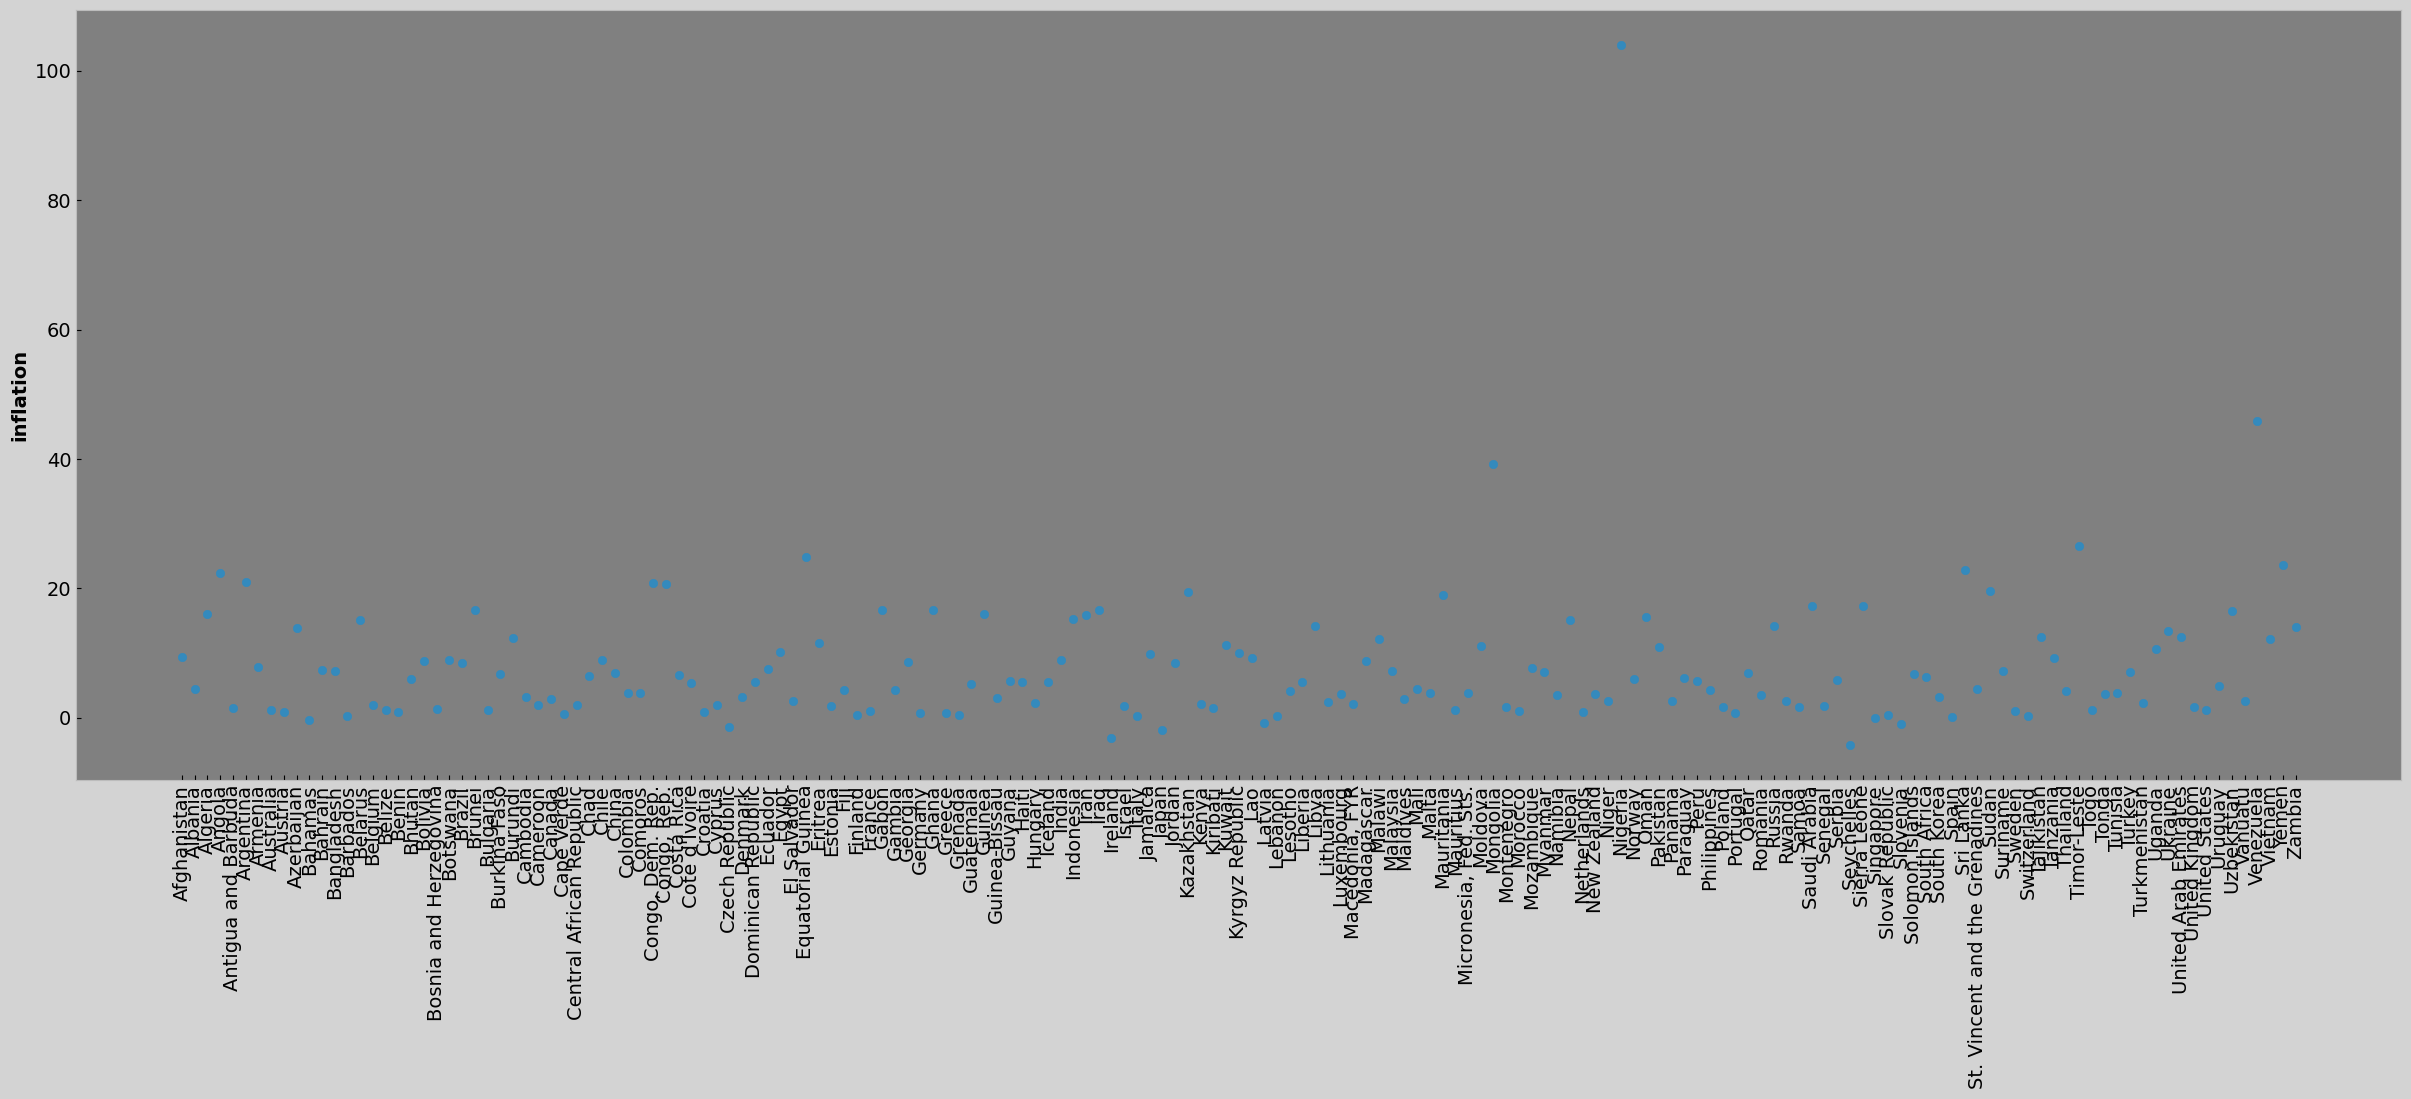

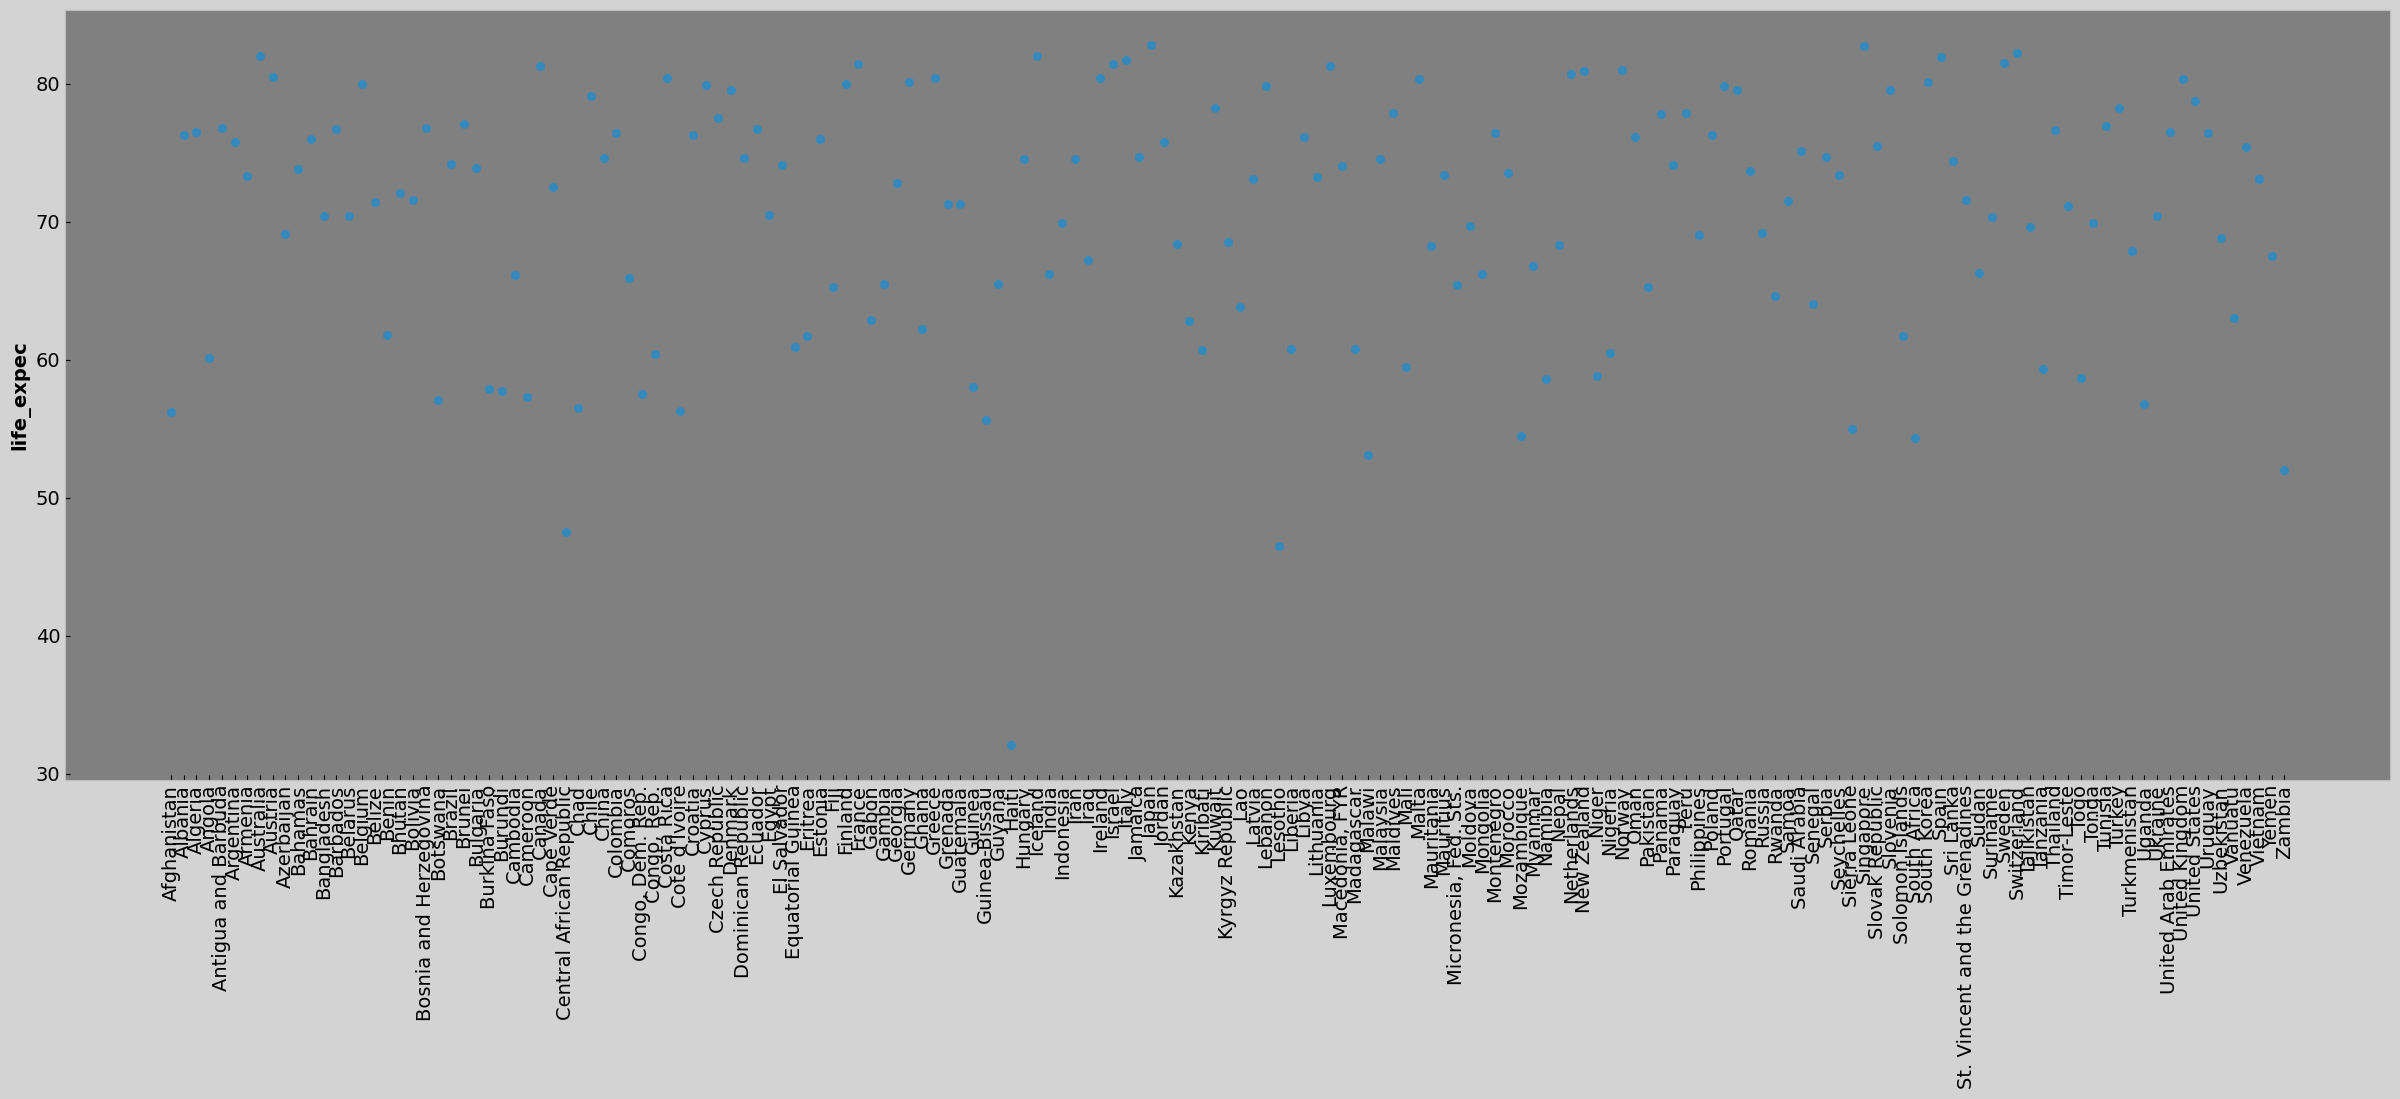

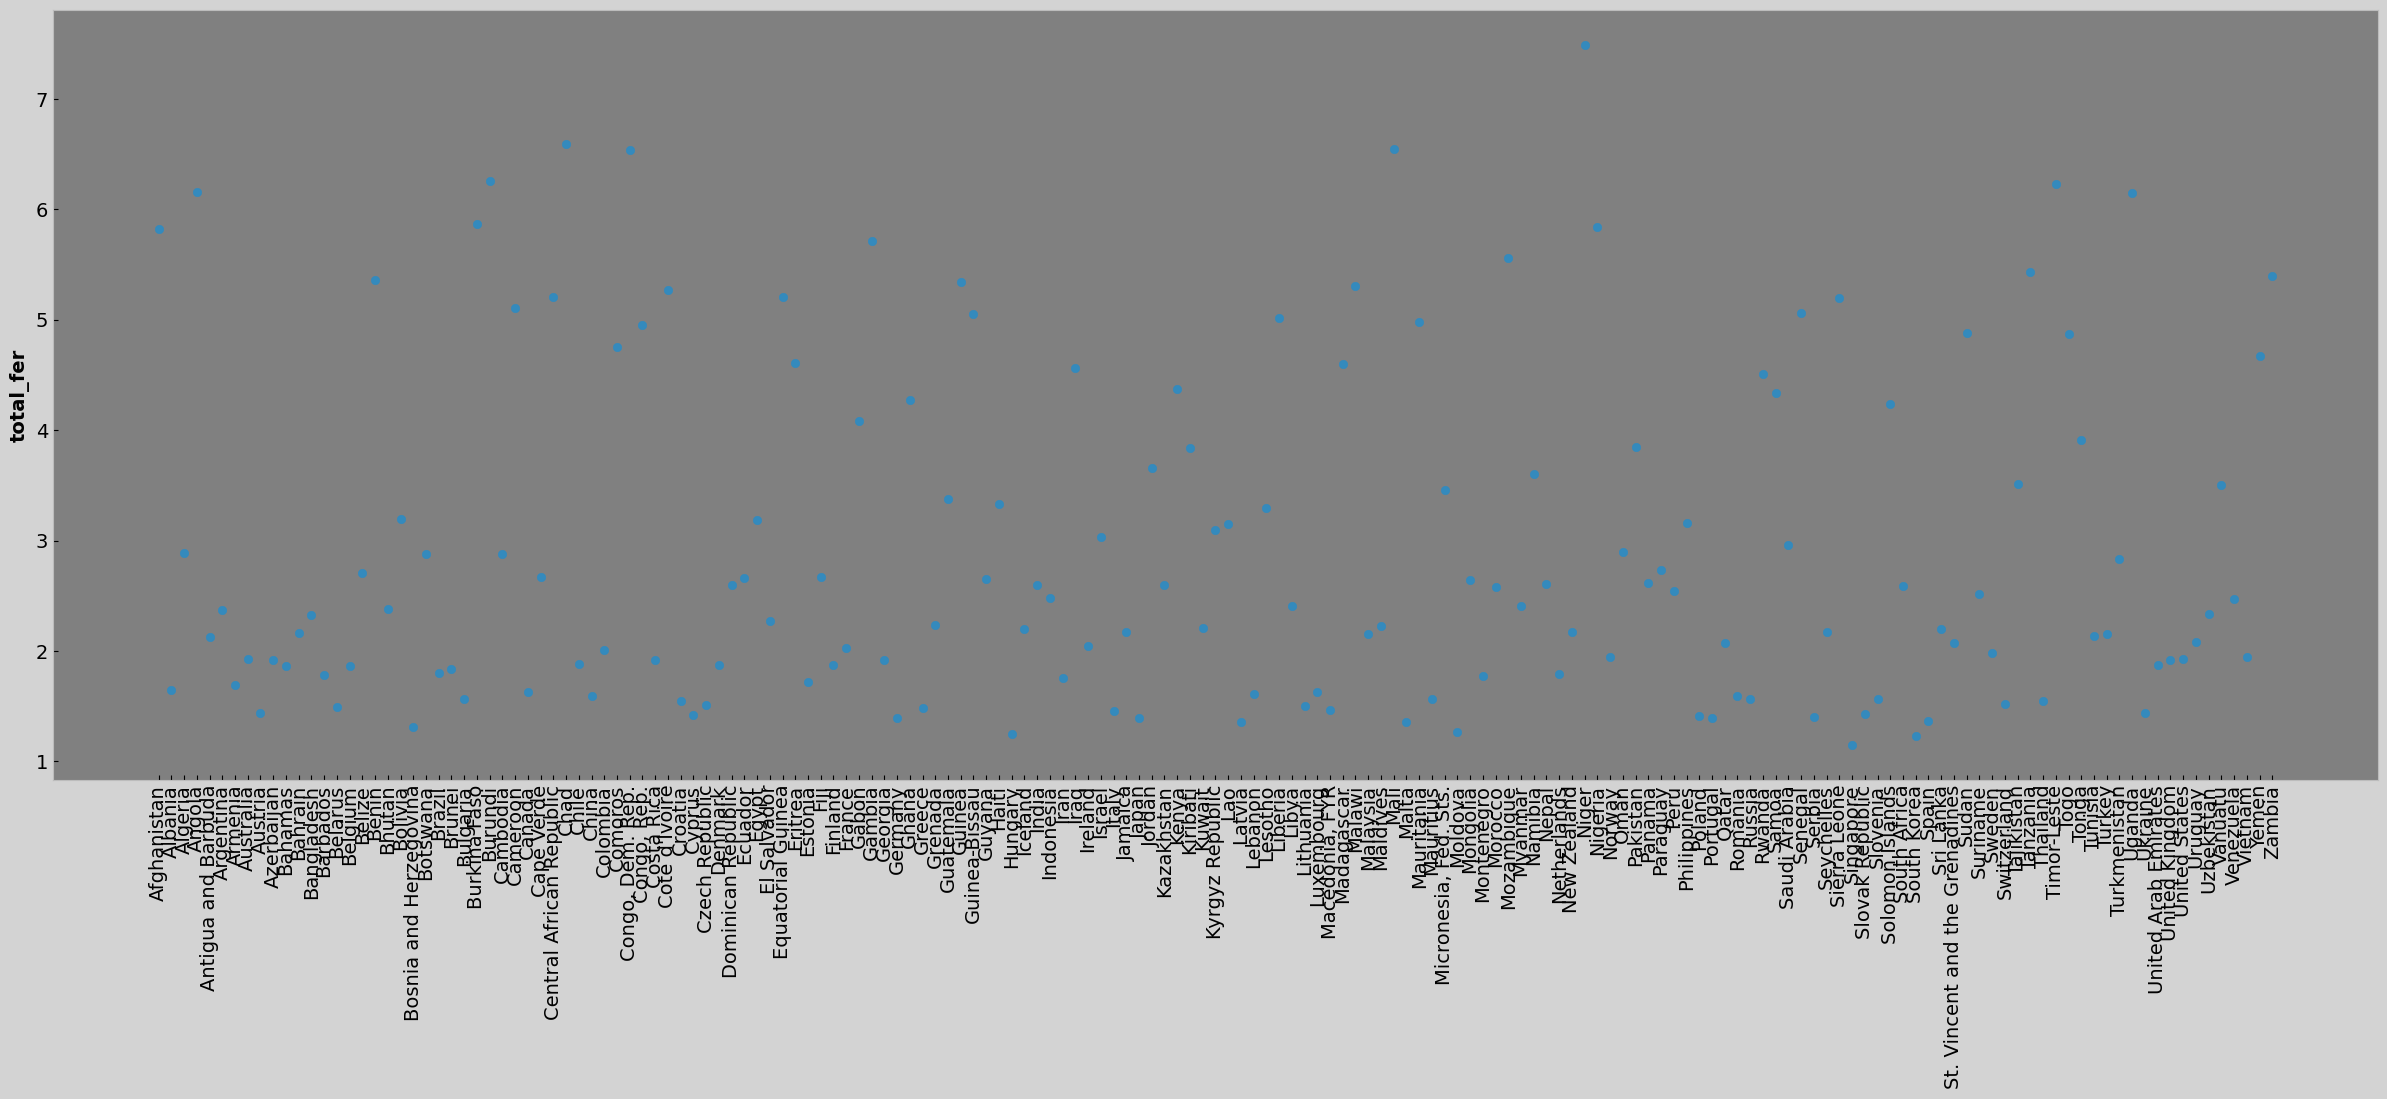

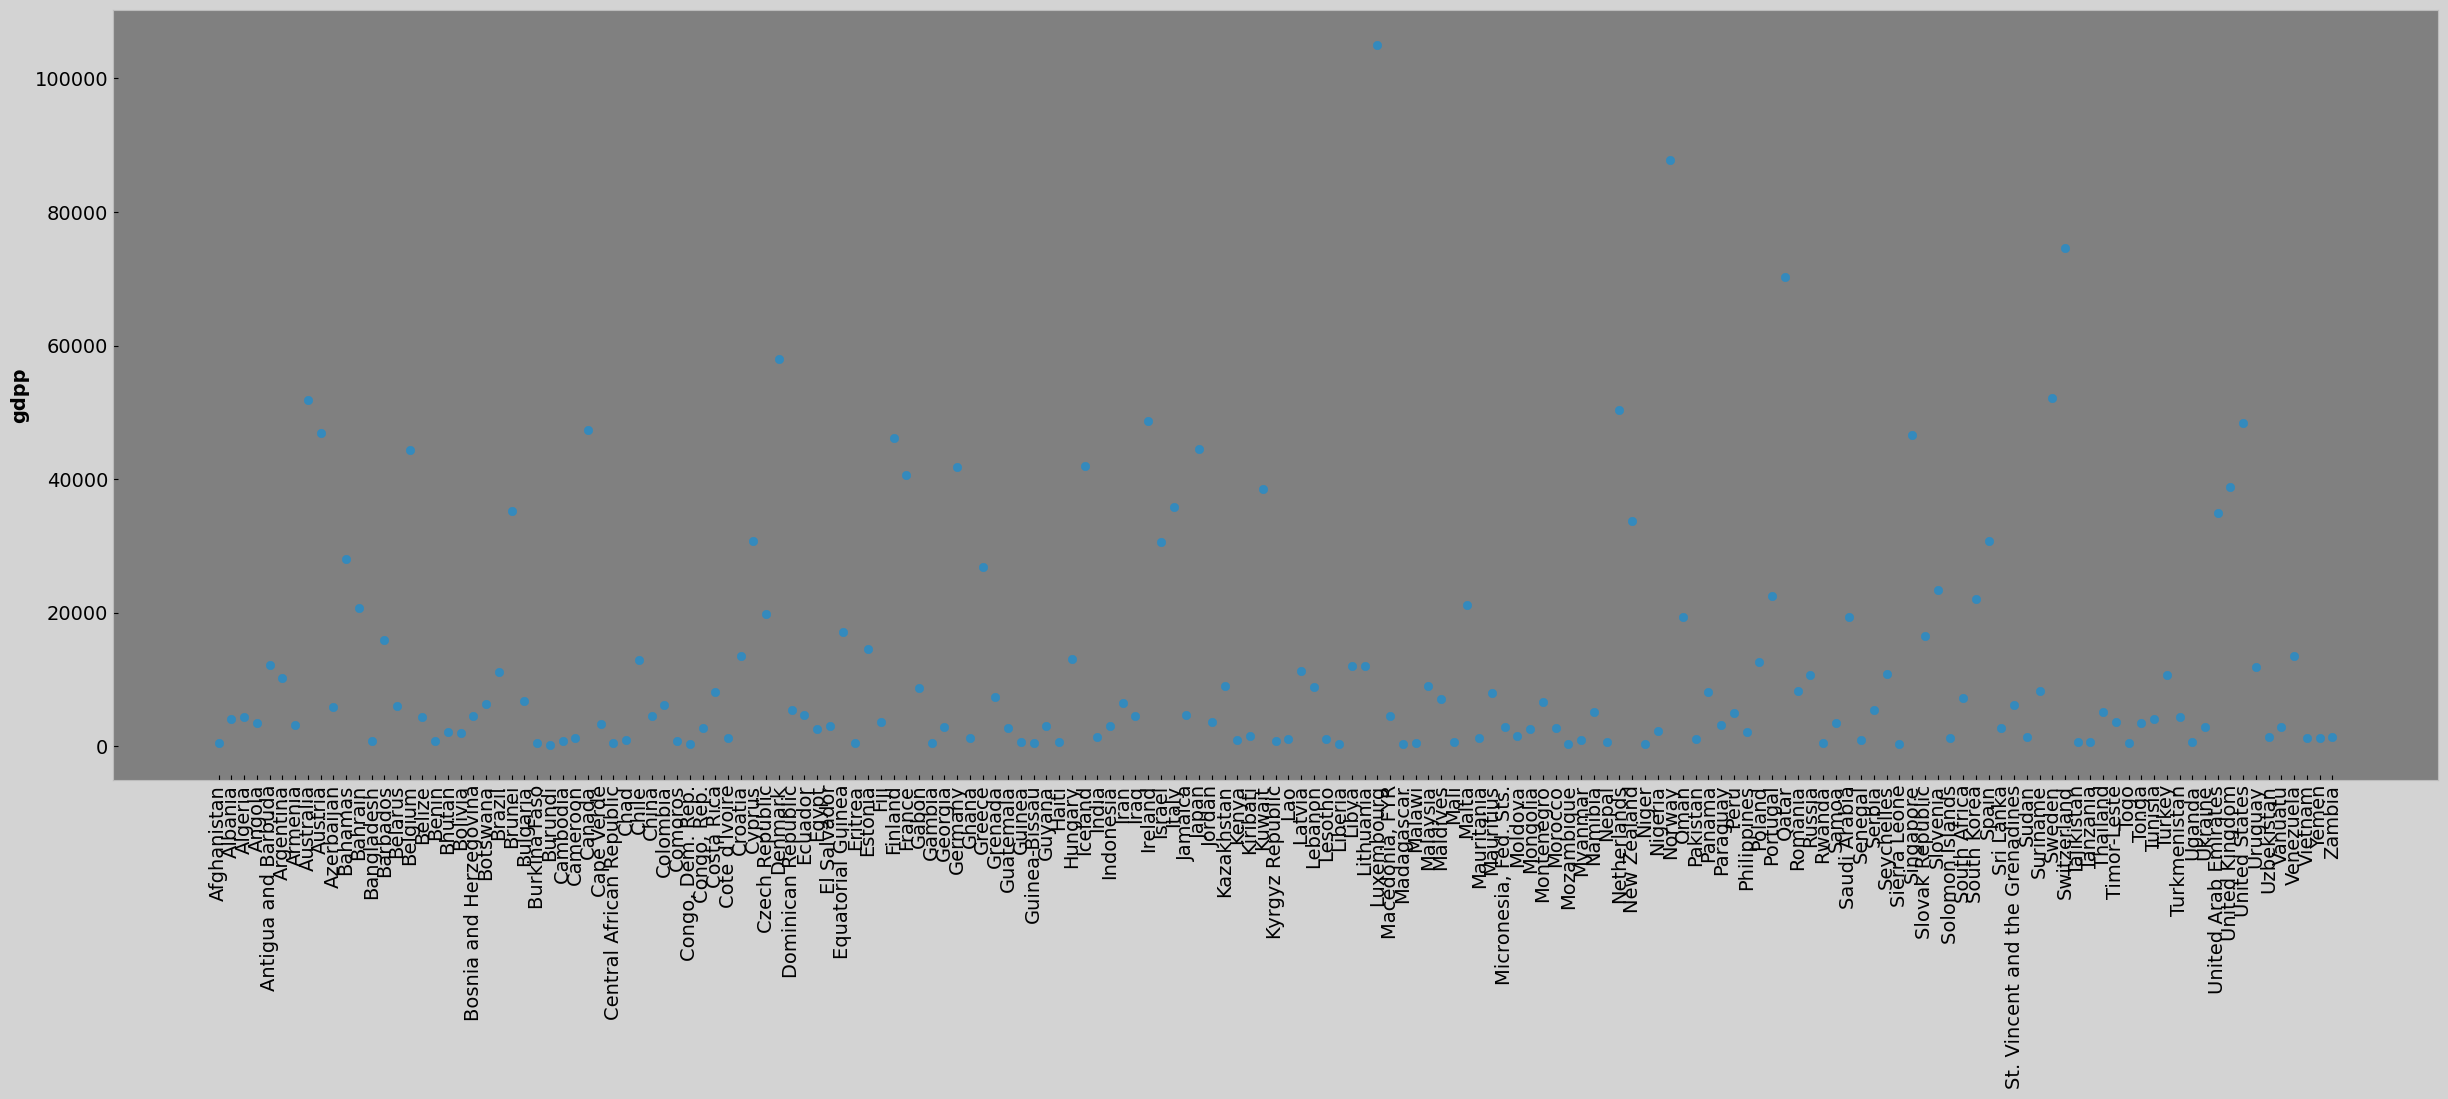

In [235]:
for col in df.columns:
    if col=='country':
        continue
    plt.figure(figsize=(30,10))
    plt.scatter(df['country'],df[col])
    plt.ylabel(col)
    plt.grid()
    plt.xticks(rotation=90)
    # plt.savefig(col)
    plt.show()

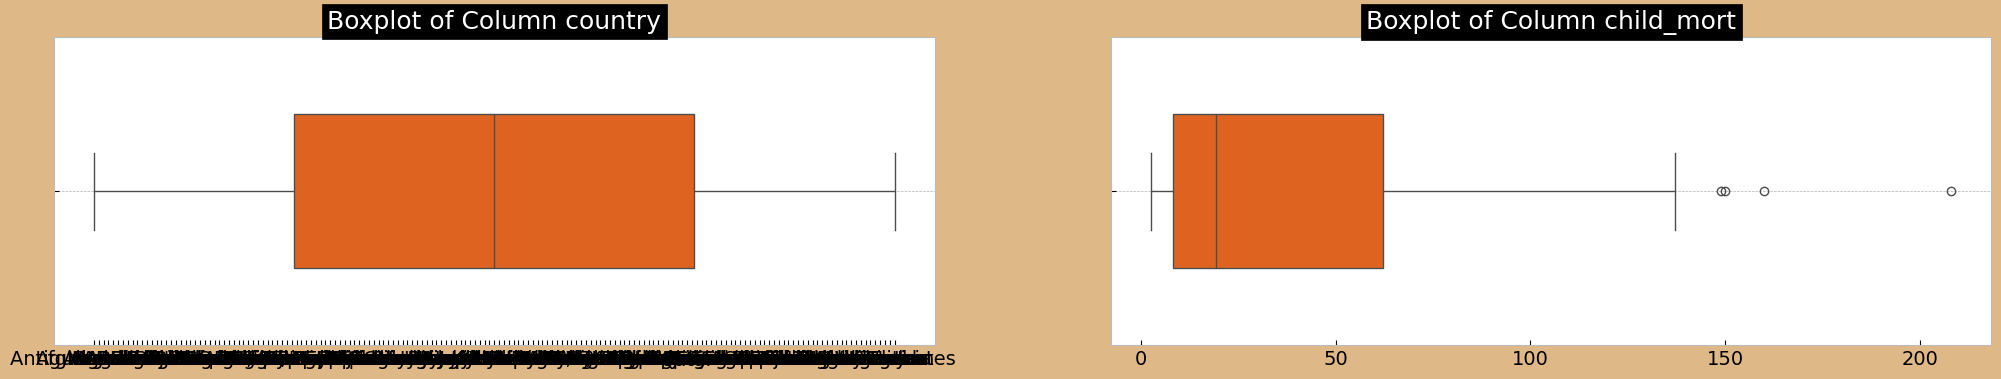

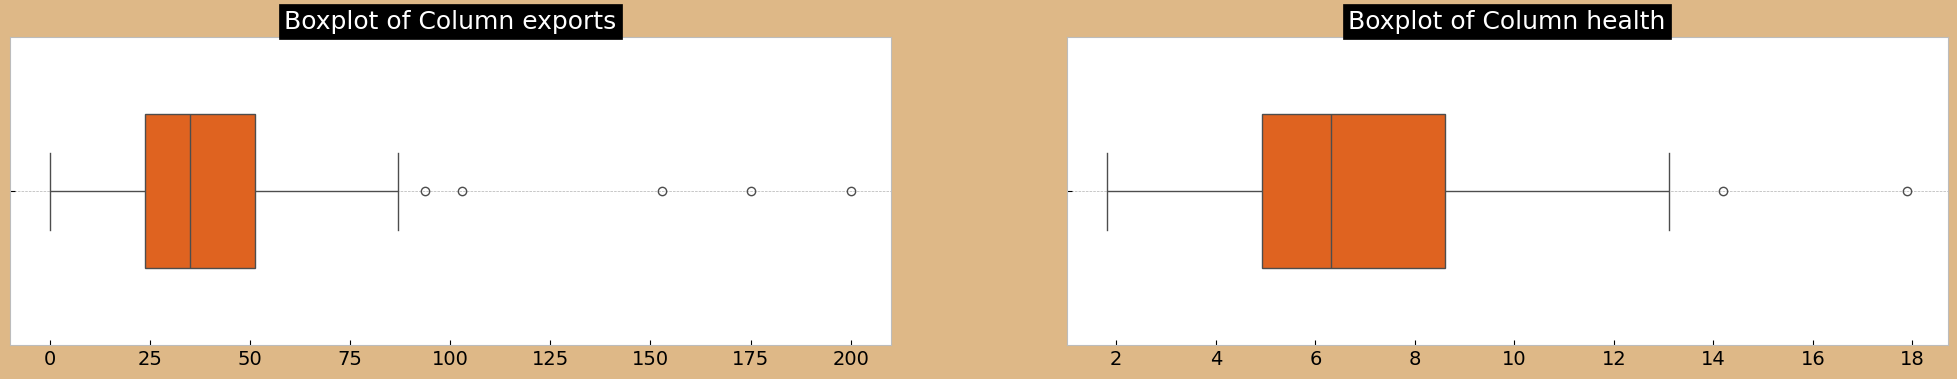

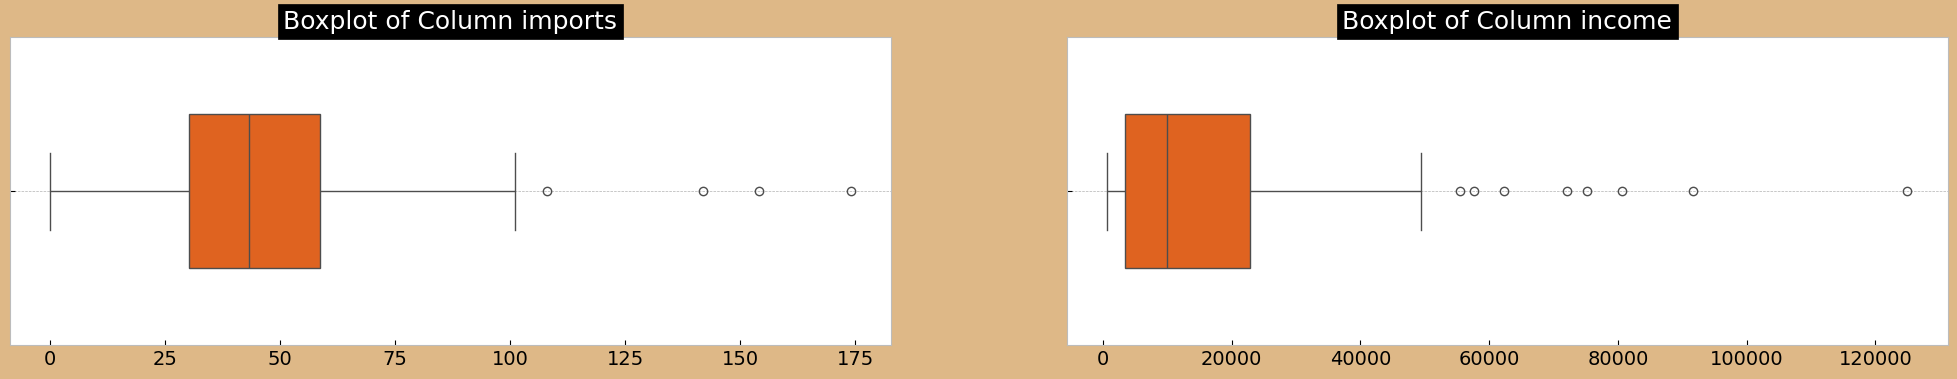

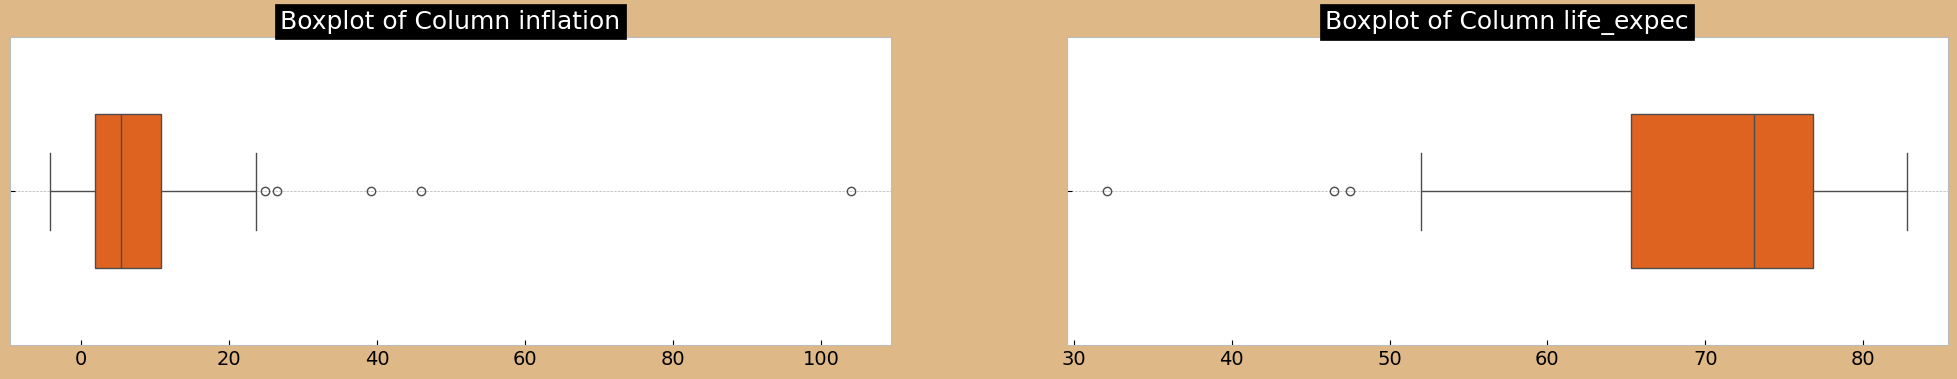

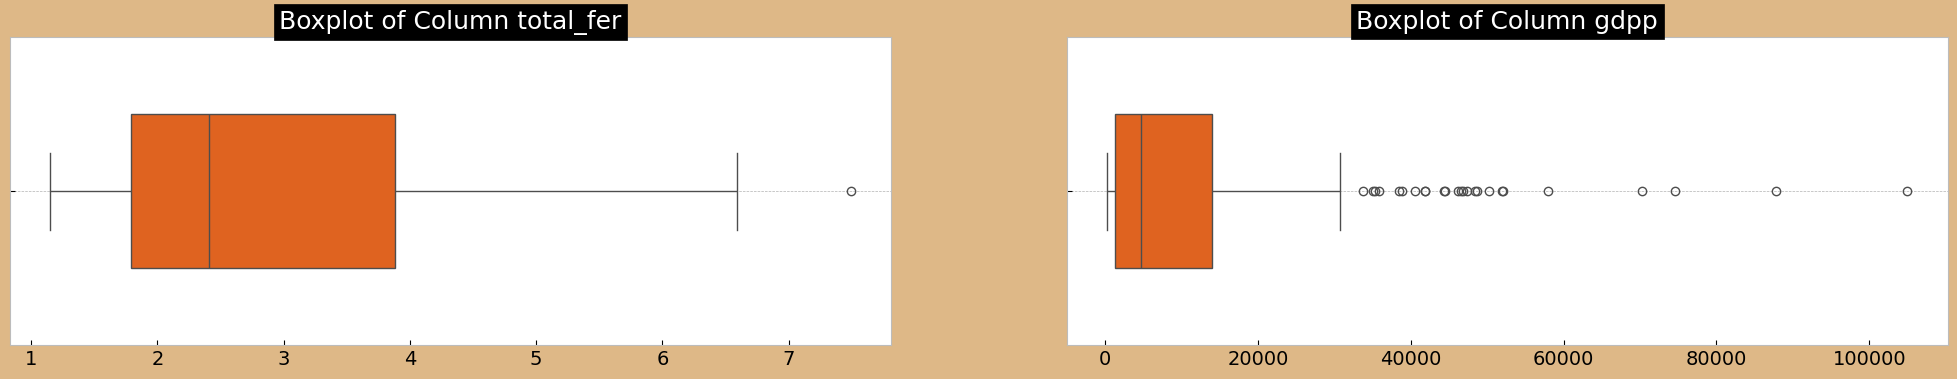

In [236]:
df_box = df.columns
i =  0
while i < len(df_box):
    fig = plt.figure(figsize = (25, 4), facecolor='burlywood')
    
    plt.subplot (1 , 2 , 1)
    box = sns.boxplot(x=df_box [i], data=df, palette="hot_r", width=0.5, dodge=True )
    box.set_title("Boxplot of Column " + df_box [i] , fontsize=18 , backgroundcolor = 'black',color='white')
    box.set(xlabel=None)
    box.set_facecolor('white')
    plt.grid()
    i += 1

    if i < len(df_box):
        plt.subplot (1 , 2 , 2)
        box = sns.boxplot(x=df_box [i], data=df, palette="hot_r", width=0.5, dodge=True )
        box.set_title("Boxplot of Column " + df_box [i] , fontsize=18 , backgroundcolor = 'black',color='white')
        box.set(xlabel=None)
        box.set_facecolor('white')
        plt.grid()
        i += 1

    plt.show()

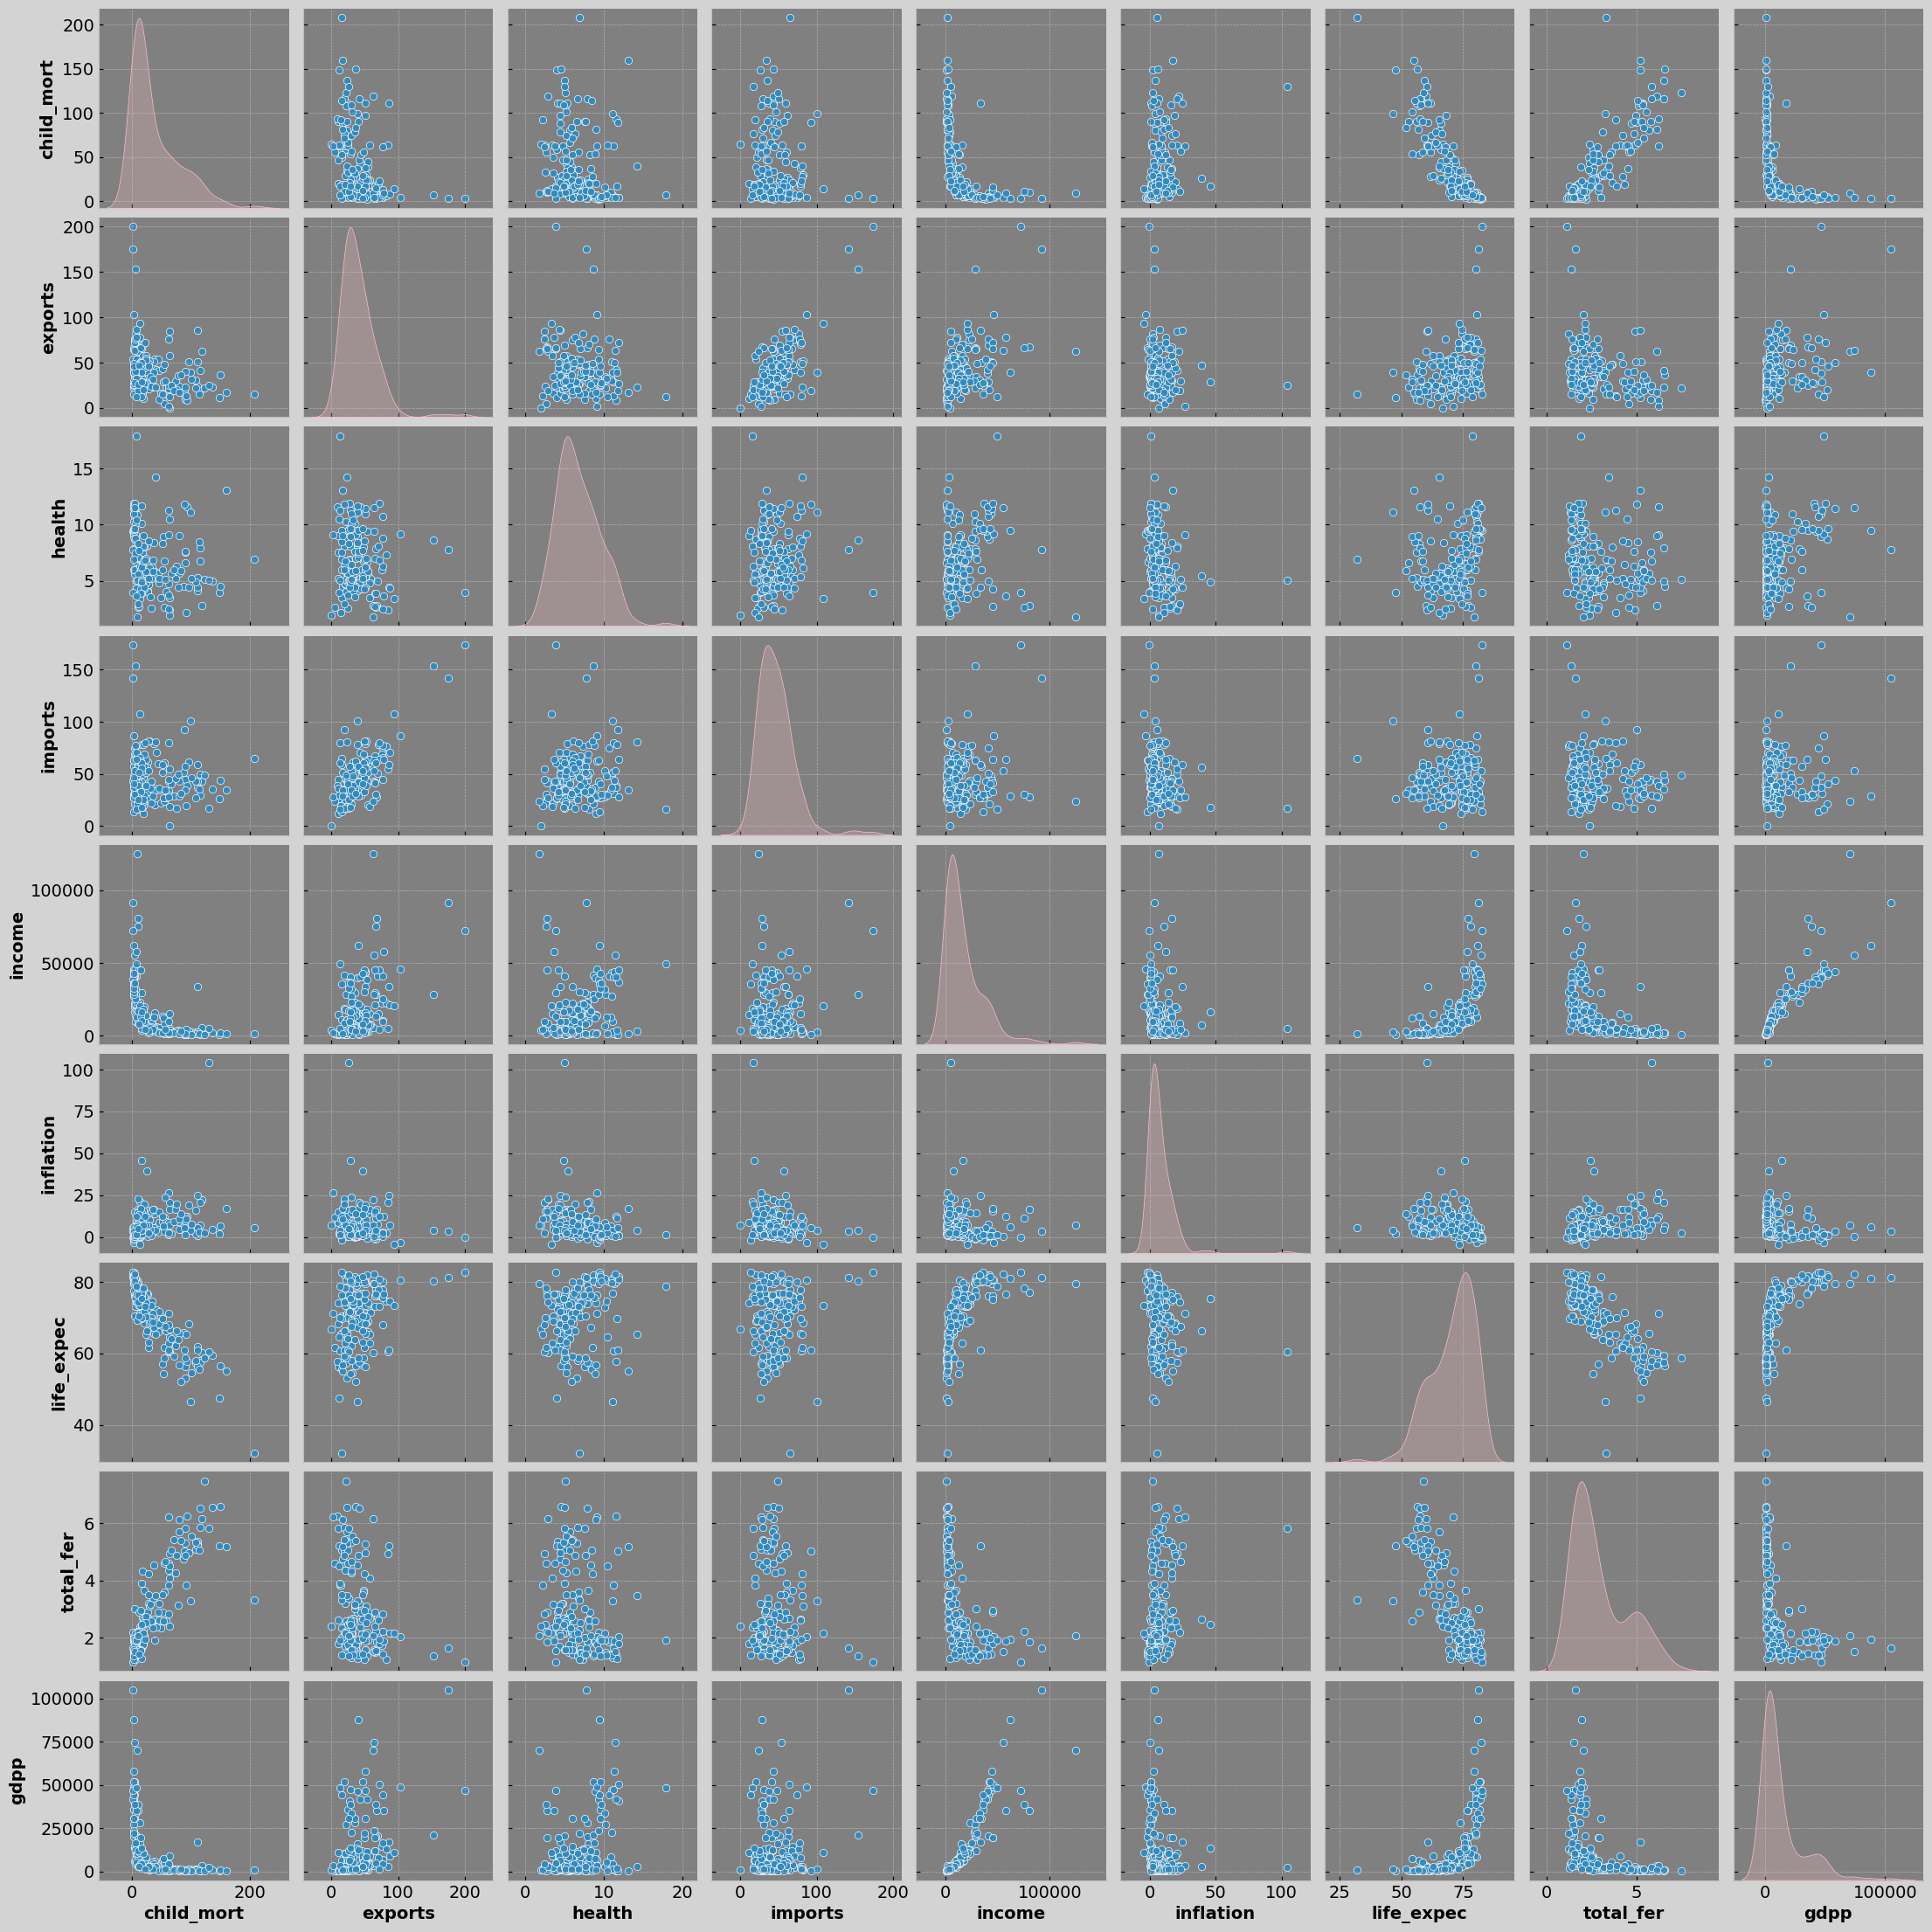

In [237]:
# Set font properties for axes and tick labels
plt.rcParams['axes.labelweight'] = 'bold'   # Bold axes labels
plt.rcParams['axes.labelsize'] = 14          # Larger font size for axes labels
plt.rcParams['xtick.labelsize'] = 14         # Larger font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 14         # Larger font size for y-axis tick labels


# Create pairplot with custom palette and adjusted font properties
pairplot = sns.pairplot(df.select_dtypes(include='number'), diag_kind='kde', diag_kws={'color': 'pink'})
plt.show()

In [238]:
df2=df.drop(columns='country')

In [239]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler ()              # scalling the features
scaled_features = scaler.fit_transform (df2)

In [240]:
df2

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89   4460  
3         6.16   3530  
4         2.13  12200  
..         ...    ...  
162       3.50   2970  
163       2.47  13500  
164       1.95   1310  
165       4.67   1310  
166       5.40   1460  

[167 rows x 9 columns]

In [241]:
from sklearn.decomposition import PCA,IncrementalPCA
# Perform PCA with 9 components
pca = PCA( svd_solver='randomized').fit(scaled_features)
explained_variance_ratio = pca.explained_variance_ratio_

# Print explained variance ratios
print("Explained variance ratios:")
print(explained_variance_ratio)

Explained variance ratios:
[0.55001227 0.13384784 0.12301053 0.09749047 0.03777964 0.03013659
 0.01190434 0.00887791 0.00694042]


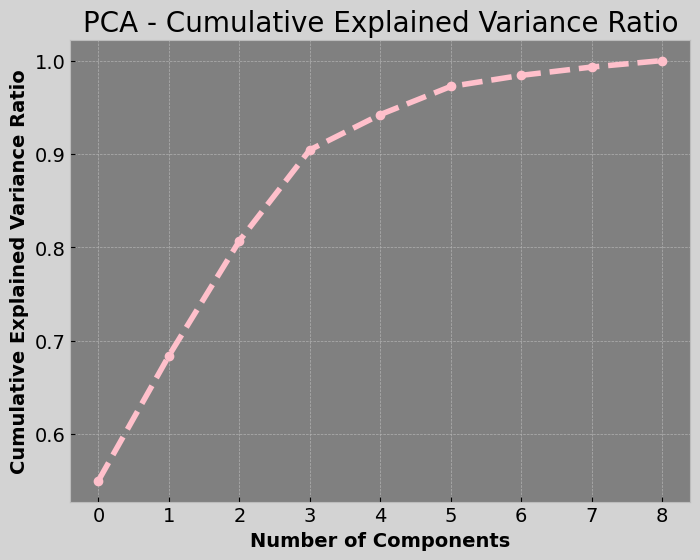

In [242]:
# Plotting the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), color='pink', linewidth=4, marker='o', linestyle='--')
plt.title("PCA - Cumulative Explained Variance Ratio", fontsize=20)
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance Ratio', fontsize=14)
plt.grid(True)
plt.show()

In [243]:
# Determine the number of components explaining at least 95% variance
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining at least 95% variance: {num_components}")


Number of components explaining at least 95% variance: 6


In [244]:
# Final PCA transformation with IncrementalPCA
final_pca = IncrementalPCA(n_components=6).fit_transform(df2)
print("Shape of the transformed data:", final_pca.shape)
print("First few rows of the transformed data:")
final_pca[:6]

Shape of the transformed data: (167, 6)
First few rows of the transformed data:


array([[-1.98151280e+04,  1.65112472e+03,  3.84249331e+01,
        -1.91969235e-01, -1.33909716e+01,  6.54891999e+00],
       [-1.13389390e+04, -1.49346903e+03, -2.81821542e+01,
        -1.40704945e+01, -7.86827098e+00,  2.82809721e+00],
       [-8.92635259e+03, -3.26468410e+03, -1.19161103e+01,
        -1.68046383e+01,  1.22284790e+01,  1.35465306e-01],
       [-1.46524659e+04,  8.67795270e+02,  5.95583655e+01,
         4.04921531e+01,  2.41334699e+01, -6.16779871e+00],
       [ 8.96142032e+02, -1.89847815e+03, -2.91339546e+01,
         5.07517829e-01, -7.63546067e+00,  3.74318491e-01],
       [-6.99699306e+02, -3.00451171e+03, -7.60070273e+00,
        -4.52389608e+01,  1.00174422e+01,  7.40141185e+00]])

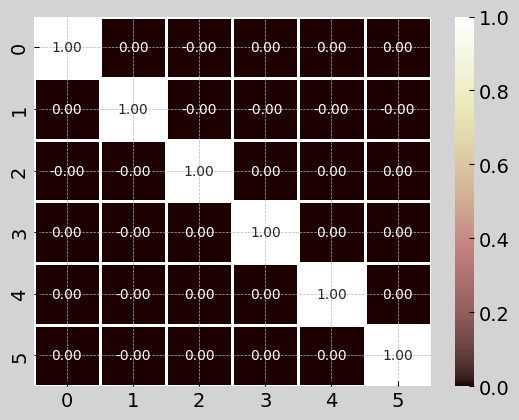

In [245]:
# Transpose the DataFrame
pc = np.transpose(final_pca)
corrmat = np.corrcoef(pc)
sns.heatmap(data=corrmat, annot=True, fmt=".2f", linewidth=0.75, cmap="pink")
plt.show()

In [246]:
# Convert the result to a DataFrame
final_pca_df = pd.DataFrame(final_pca, columns=[f'PC{i+1}' for i in range(final_pca.shape[1])])
final_pca_df

PC1          PC2        PC3        PC4        PC5        PC6
0   -19815.128018  1651.124720  38.424933  -0.191969 -13.390972   6.548920
1   -11338.938992 -1493.469028 -28.182154 -14.070495  -7.868271   2.828097
2    -8926.352589 -3264.684102 -11.916110 -16.804638  12.228479   0.135465
3   -14652.465937   867.795270  59.558366  40.492153  24.133470  -6.167799
4      896.142032 -1898.478151 -29.133955   0.507518  -7.635461   0.374318
..            ...          ...        ...        ...        ...        ...
162 -17180.967679  2487.153835 -28.120649   8.631023   3.158441  -6.286132
163   -100.445973   832.252802  -7.709230 -35.835861  32.598161  23.576507
164 -17202.017189   222.889872 -45.250200  39.915014   8.341255   3.666643
165 -17209.340213   229.815901   7.958778  -7.521719  12.973323   7.507504
166 -17978.421643  1163.124631  32.202281   5.351710  12.188256  -6.022556

[167 rows x 6 columns]

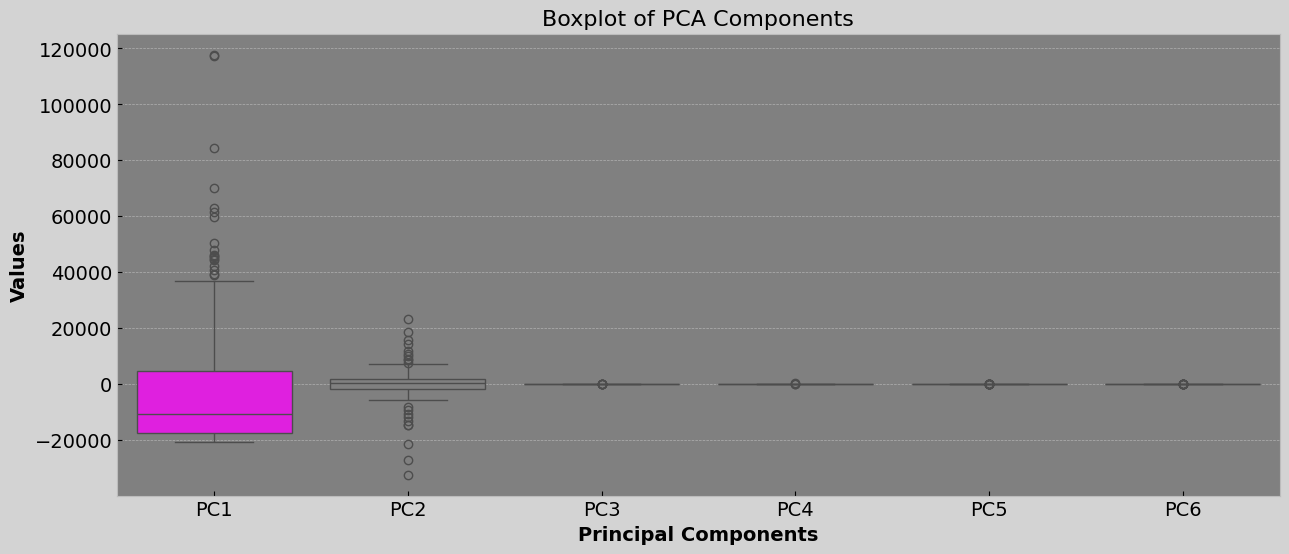

In [247]:
fig, ax = plt.subplots(figsize=(15,6))
# Custom color palette
custom_colors = ['magenta', 'gray']

sns.boxplot(data=final_pca_df, palette=custom_colors, ax=ax)

# Customize labels and title
ax.set_title('Boxplot of PCA Components', fontsize=16)
ax.set_xlabel('Principal Components', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
plt.show()

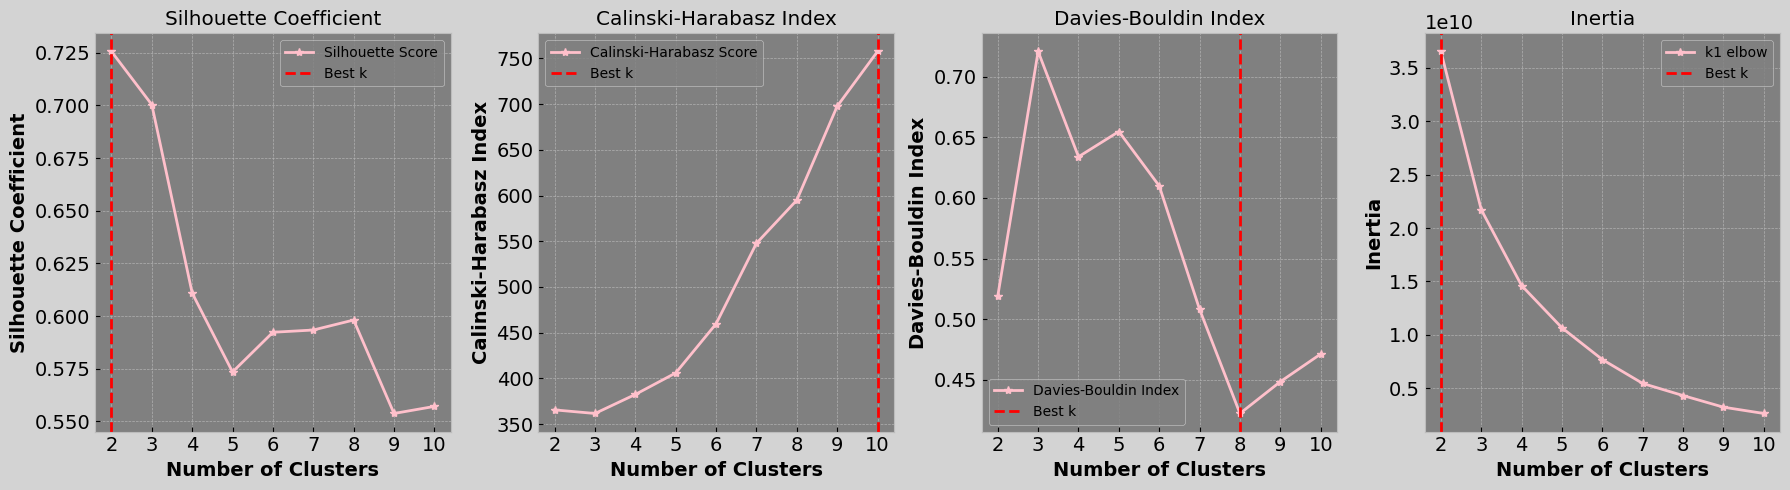

Best number of clusters (Elbow method): 2
Best number of clusters (Silhouette Score): 2
Best number of clusters (Calinski-Harabasz Index): 10
Best number of clusters (Davies-Bouldin Index): 8


In [248]:
# KMeans parameters
kmeans_set = {
    'n_init': 10,
    'max_iter': 300}

# Set the style

# Set the background color
plt.rcParams['axes.facecolor'] = 'gray'

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(18, 5))

# Define the range of cluster numbers
cluster_range = range(2, 11)

# Initialize lists to store metric values for each k
silhouette_coef = []
calinski_harabasz_coef = []
davies_bouldin_coef = []
inertia = []

# Loop through each cluster number
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(final_pca_df)
    
    # Append metric values for the current k
    silhouette_coef.append(silhouette_score(final_pca_df, kmeans.labels_))
    calinski_harabasz_coef.append(calinski_harabasz_score(final_pca_df, kmeans.labels_))
    davies_bouldin_coef.append(davies_bouldin_score(final_pca_df, kmeans.labels_))
    inertia.append(kmeans.inertia_)

# Determine the best number of clusters using the Elbow method and Silhouette score
best_k_elbow = np.argmax(np.diff(np.diff(inertia))) + 2
best_k_silhouette = np.argmax(silhouette_coef) + 2
best_k_calinski = np.argmax(calinski_harabasz_coef) + 2
best_k_davies = np.argmin(davies_bouldin_coef) + 2

# Plotting silhouette coefficient
axs[0].plot(cluster_range, silhouette_coef, marker='*', color='pink', label='Silhouette Score')
axs[0].set_xlabel("Number of Clusters")
axs[0].set_ylabel("Silhouette Coefficient")
axs[0].set_xticks(cluster_range)
axs[0].legend()
axs[0].set_title("Silhouette Coefficient")
axs[0].axvline(x=best_k_silhouette, color='red', linestyle='--', label='Best k')
axs[0].legend()

# Plotting Calinski-Harabasz index
axs[1].plot(cluster_range, calinski_harabasz_coef, marker='*', color='pink', label='Calinski-Harabasz Score')
axs[1].set_xlabel("Number of Clusters")
axs[1].set_ylabel("Calinski-Harabasz Index")
axs[1].set_xticks(cluster_range)
axs[1].legend()
axs[1].set_title("Calinski-Harabasz Index")
axs[1].axvline(x=best_k_calinski, color='red', linestyle='--', label='Best k')
axs[1].legend()

# Plotting Davies-Bouldin index
axs[2].plot(cluster_range, davies_bouldin_coef, marker='*', color='pink', label='Davies-Bouldin Index')
axs[2].set_xlabel("Number of Clusters")
axs[2].set_ylabel("Davies-Bouldin Index")
axs[2].set_xticks(cluster_range)
axs[2].legend()
axs[2].set_title("Davies-Bouldin Index")
axs[2].axvline(x=best_k_davies, color='red', linestyle='--', label='Best k')
axs[2].legend()

# Plotting Inertia
axs[3].plot(cluster_range, inertia, marker='*', color='pink', label='k1 elbow')
axs[3].set_xlabel("Number of Clusters")
axs[3].set_ylabel("Inertia")
axs[3].set_xticks(cluster_range)
axs[3].legend()
axs[3].set_title("Inertia")
axs[3].axvline(x=best_k_elbow, color='red', linestyle='--', label='Best k')
axs[3].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print the best number of clusters
print(f"Best number of clusters (Elbow method): {best_k_elbow}")
print(f"Best number of clusters (Silhouette Score): {best_k_silhouette}")
print(f"Best number of clusters (Calinski-Harabasz Index): {best_k_calinski}")
print(f"Best number of clusters (Davies-Bouldin Index): {best_k_davies}")

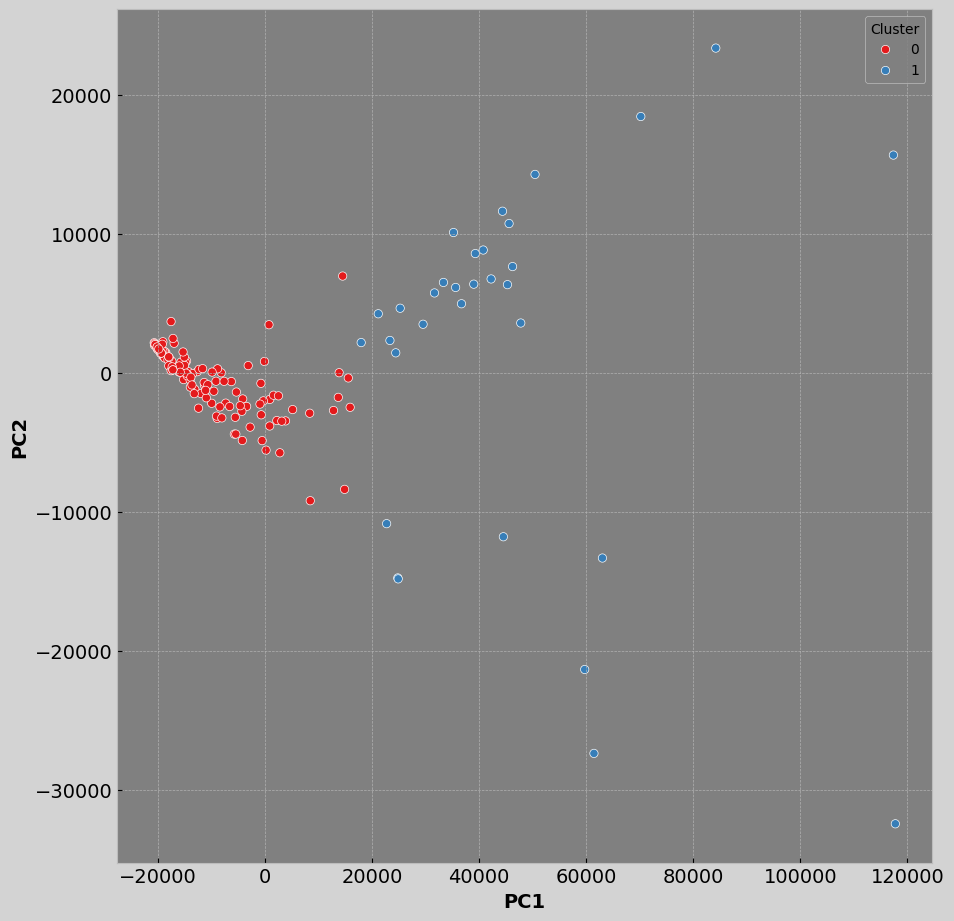

In [249]:
# Perform KMeans clustering with n_clusters=2
kmeans = KMeans(n_clusters=2, **kmeans_set)
final_pca_df['Cluster'] = kmeans.fit_predict(final_pca_df)

# Create subplots for each pair of PCs (PC1 to PC6)
fig, axs = plt.subplots(2, 2, figsize=(18, 18))

# Iterate through each pair of PCs (PC1 to PC6)
for i in range(2):
    for j in range(2):
        if i != j and i < j:
            # Plot scatter plot for PC i vs PC j colored by 'Cluster'
            sns.scatterplot(data=final_pca_df, x=f'PC{i+1}', y=f'PC{j+1}', hue='Cluster', palette='Set1', ax=axs[i, j])
            axs[i, j].set_xlabel(f'PC{i+1}')
            axs[i, j].set_ylabel(f'PC{j+1}')
            axs[i, j].legend(title='Cluster', loc='upper right')
        else:
            axs[i, j].set_visible(False)  # Hide the diagonal and lower triangle plots

# Adjust layout
plt.tight_layout()
plt.show()

In [250]:
kmeans = KMeans(n_clusters=2).fit(final_pca_df)


# Assuming `country` is still accessible
# Add 'Country' column to final_pca_df
final_pca_df.insert(0, 'Country', df['country'])
final_pca_df['class'] = kmeans.labels_
final_pca_df['Cluster'] = final_pca_df['class']
poor = int(final_pca_df[final_pca_df.Country=='Afghanistan']['class'])

rich = int(final_pca_df[final_pca_df.Country=='Canada']['class'])
poor_label = 'Poor countries'
rich_label = 'Rich countries'
final_pca_df.replace({'Cluster':{poor:poor_label,  rich:rich_label}},inplace=True)
final_pca_df

Country           PC1          PC2        PC3        PC4  \
0            Afghanistan -19815.128018  1651.124720  38.424933  -0.191969   
1                Albania -11338.938992 -1493.469028 -28.182154 -14.070495   
2                Algeria  -8926.352589 -3264.684102 -11.916110 -16.804638   
3                 Angola -14652.465937   867.795270  59.558366  40.492153   
4    Antigua and Barbuda    896.142032 -1898.478151 -29.133955   0.507518   
..                   ...           ...          ...        ...        ...   
162              Vanuatu -17180.967679  2487.153835 -28.120649   8.631023   
163            Venezuela   -100.445973   832.252802  -7.709230 -35.835861   
164              Vietnam -17202.017189   222.889872 -45.250200  39.915014   
165                Yemen -17209.340213   229.815901   7.958778  -7.521719   
166               Zambia -17978.421643  1163.124631  32.202281   5.351710   

           PC5        PC6         Cluster  class  
0   -13.390972   6.548920  Poor countries      0  
1    -7.868271   2.828097  Poor countries      0  
2    12.228479   0.135465  Poor countries      0  
3    24.133470  -6.167799  Poor countries      0  
4    -7.635461   0.374318  Poor countries      0  
..         ...        ...             ...    ...  
162   3.158441  -6.286132  Poor countries      0  
163  32.598161  23.576507  Poor countries      0  
164   8.341255   3.666643  Poor countries      0  
165  12.973323   7.507504  Poor countries      0  
166  12.188256  -6.022556  Poor countries      0  

[167 rows x 9 columns]

In [251]:
final_pca_df['Cluster'].value_counts()

Cluster
Poor countries    135
Rich countries     32
Name: count, dtype: int64

In [252]:
import plotly.graph_objects as go
# Create a different style choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=final_pca_df['Country'],
    locationmode='country names',
    z=final_pca_df['class'],
    text=final_pca_df[['Country', 'Cluster']],
    colorscale=[[0, 'darkred'], [0.5, 'orange'], [1, 'darkgreen']],
    autocolorscale=False,
    reversescale=True,
    marker_line_color='black',
    marker_line_width=0.5,
    colorbar_title='Economic Status',
    hovertemplate='<b>%{text.Country}</b><br>Cluster: %{text.Cluster}<extra></extra>',
))

fig.update_layout(
    title_text='Economic Status of Countries',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        coastlinecolor='white',
        projection_type='orthographic',  # Different projection type
        landcolor='black',
        oceancolor='rgb(10,10,30)',
        bgcolor='rgb(10,10,30)',
    ),
    margin=dict(l=0, r=0, b=0, t=40, pad=2),
    paper_bgcolor='rgb(10,10,30)',  # Dark background
    font=dict(color='white')  # White font for better contrast
)

# Show the plot
fig.show()

In [254]:
from sklearn.cluster import KMeans

vc=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300)
    kmeans.fit(scaled_features)
    vc.append(kmeans.inertia_)
vc

[42.79871877568751,
 25.94244332622334,
 19.345118591450642,
 16.961181105881025,
 14.984580851917165,
 13.614771828490142,
 12.35914115341159,
 11.917611562864046,
 10.882544474341547,
 10.03850072551616]

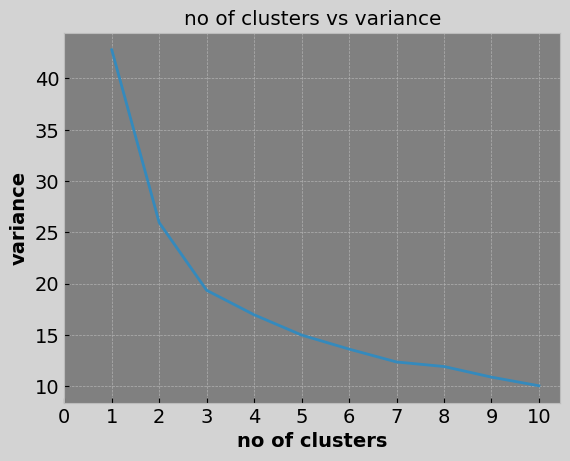

In [255]:
# plotting variance(vc) and clusters(i)

import matplotlib.pyplot as plt
plt.plot(range(1,11),vc)
plt.xticks(range(0,11))
plt.xlabel('no of clusters')
plt.ylabel('variance')
plt.title('no of clusters vs variance')
plt.show()

In [256]:
from kneed import DataGenerator, KneeLocator
kneedle = KneeLocator(range(1,11), vc, S=1.0, curve="convex", direction="decreasing")
kneedle.elbow

np.int64(3)

In [257]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
silhouette_coeefficients=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42,n_init=10,max_iter=300)
    kmeans.fit(scaled_features)
    silhouette_coeefficients.append(silhouette_score(scaled_features,kmeans.labels_))
silhouette_coeefficients

[np.float64(0.384471920619431),
 np.float64(0.34265474105126204),
 np.float64(0.34600192038431477),
 np.float64(0.24494459582688077),
 np.float64(0.2713919286978024),
 np.float64(0.22780193046320513),
 np.float64(0.2373514828741261),
 np.float64(0.2301217794811209),
 np.float64(0.23629352095186848)]

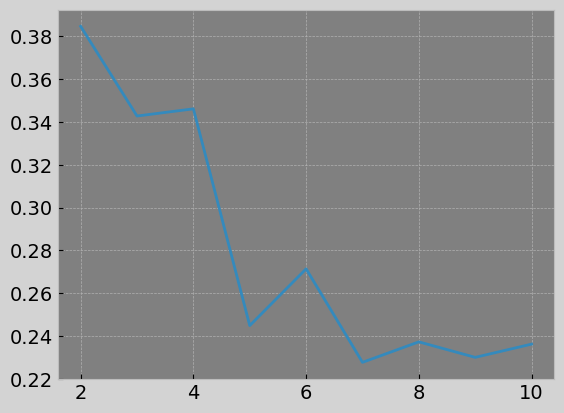

In [258]:
plt.plot(range(2,11),silhouette_coeefficients)

In [260]:
# model creation

kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans.fit(scaled_features)
y_pred=kmeans.predict(scaled_features)
y_pred

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [261]:
df['cluster output']=y_pred
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  cluster output  
0         9.44        56.2       5.82    553               2  
1         4.49        76.3       1.65   4090               0  
2        16.10        76.5       2.89   4460               0  
3        22.40        60.1       6.16   3530               2  
4         1.44        76.8       2.13  12200               0  
..         ...         ...        ...    ...             ...  
162       2.62        63.0       3.50   2970               0  
163      45.90        75.4       2.47  13500               0  
164      12.10        73.1       1.95   1310               0  
165      23.60        67.5       4.67   1310               2  
166      14.00        52.0       5.40   1460               2  

[167 rows x 11 columns]

In [262]:
df['cluster output'].value_counts()

cluster output
0    87
2    45
1    35
Name: count, dtype: int64

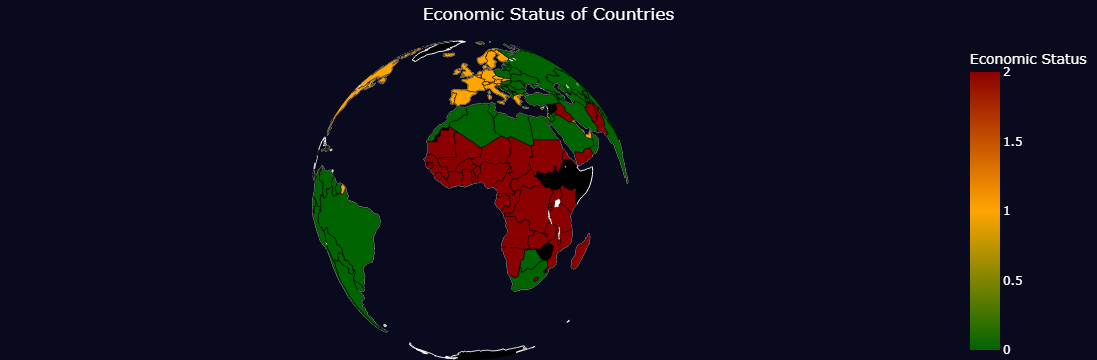

In [270]:
import plotly.graph_objects as go
# Create a different style choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=df['country'],
    locationmode='country names',
    z=df['cluster output'],
    text=df[['country', 'cluster output']],
    colorscale=[[0, 'darkred'], [0.5, 'orange'], [1, 'darkgreen']],
    autocolorscale=False,
    reversescale=True,
    marker_line_color='black',
    marker_line_width=0.5,
    colorbar_title='Economic Status',
    hovertemplate='<b>%{text.Country}</b><br>Cluster: %{text.Cluster}<extra></extra>',
))

fig.update_layout(
    title_text='Economic Status of Countries',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        coastlinecolor='white',
        projection_type='orthographic',  # Different projection type
        landcolor='black',
        oceancolor='rgb(10,10,30)',
        bgcolor='rgb(10,10,30)',
    ),
    margin=dict(l=0, r=0, b=0, t=40, pad=2),
    paper_bgcolor='rgb(10,10,30)',  # Dark background
    font=dict(color='white')  # White font for better contrast
)

# Show the plot
fig.show()

In [269]:
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  cluster output  
0         9.44        56.2       5.82    553               2  
1         4.49        76.3       1.65   4090               0  
2        16.10        76.5       2.89   4460               0  
3        22.40        60.1       6.16   3530               2  
4         1.44        76.8       2.13  12200               0  
..         ...         ...        ...    ...             ...  
162       2.62        63.0       3.50   2970               0  
163      45.90        75.4       2.47  13500               0  
164      12.10        73.1       1.95   1310               0  
165      23.60        67.5       4.67   1310               2  
166      14.00        52.0       5.40   1460               2  

[167 rows x 11 columns]